# Transfer learning-based image classification : Optimizing Transfer Learning for Efficient Image Classification in Remote Sensing Applications
## Group Member:
Mohammad Azizul Kawser (Student ID: 2207846) - azizul.kawser@student.oulu.fi

Talha Zeeshan (Student ID: 2207604) - Talha.Zeeshan@student.oulu.fi

## **Task 1.1: Data Preparation and Understanding (2 points)**

### **1.1.1:** Download the miniImageNet dataset.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import gdown

# Download URL miniImageNet dataset.
file_url = 'https://drive.google.com/uc?id=107FTosYIeBn5QbynR46YG91nHcJ70whs'

# Destination path
output_path = './train.tar'

# Download the file
gdown.download(file_url, output_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=107FTosYIeBn5QbynR46YG91nHcJ70whs
To: /content/train.tar
100%|██████████| 126M/126M [00:00<00:00, 197MB/s]


'./train.tar'

### 1.1.2: Extract, read and understand the miniImageNet dataset.

In [ ]:
import tarfile
# extract into data directory
with tarfile.open('./train.tar') as tar:
    tar.extractall(path='./miniImagenet_data')

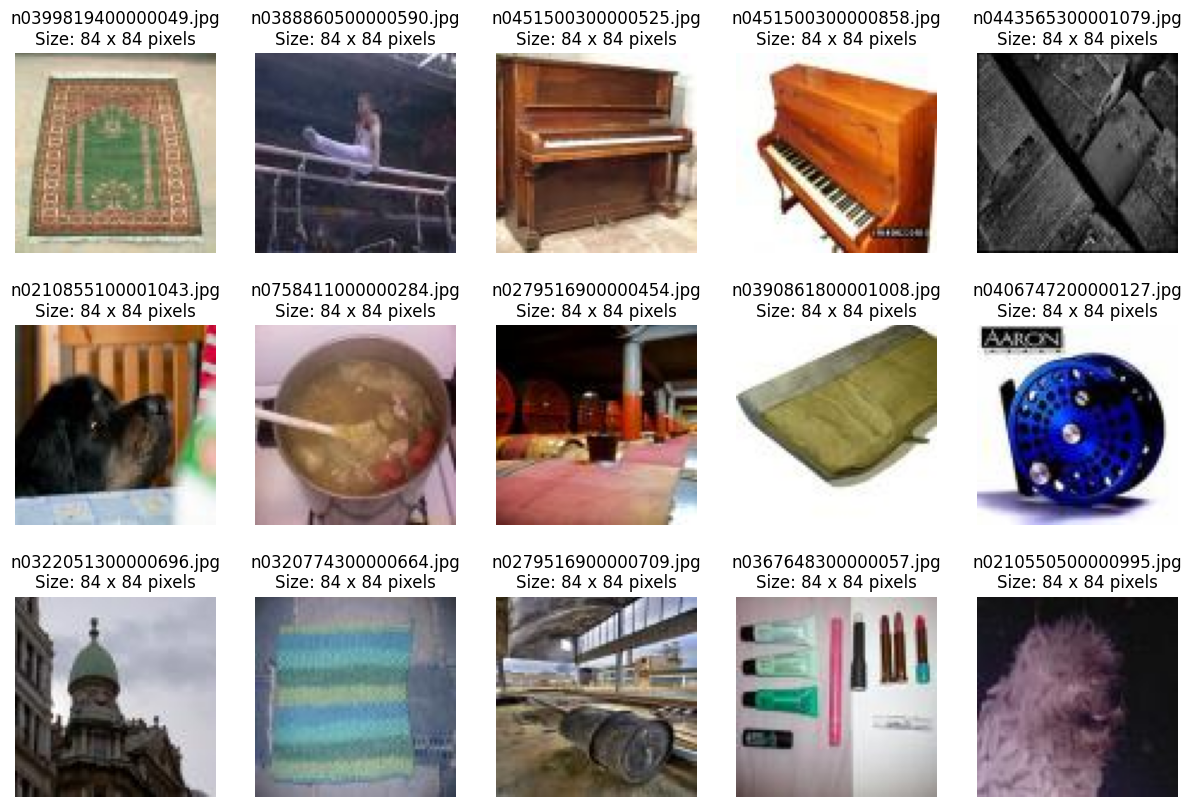

In [ ]:
# Read dataset
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

def get_image_size(image_path):
    """
    provides the image height and width.
    """
    with Image.open(image_path) as img:
        width, height = img.size
    return width, height


def display_random_images(image_folder, num_images=15):
    """
    Display random images from the folder.
    """
    # List all subdirectories and files
    all_images = []
    for subdir, _, files in os.walk(image_folder):
        for file in files:
          all_images.append(os.path.join(subdir, file))

    # Randomly select images
    selected_images = random.sample(all_images, num_images)

    # Display images
    plt.figure(figsize=(15, 10))
    for i, image_path in enumerate(selected_images, 1):
        img = mpimg.imread(image_path)
        width, height = get_image_size(image_path)
        title = f"{os.path.basename(image_path)}\nSize: {width} x {height} pixels"
        plt.subplot(3, 5, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(title)
    plt.show()

# Path directory containing images
image_folder_path = "./miniImagenet_data/train"

# Display images
display_random_images(image_folder_path)

In [ ]:
# Veiw class distribution
def count_samples_per_class(dataset_folder):
    """
    provides number of sample in each class
    """
    class_counts = {}

    for class_name in os.listdir(dataset_folder):
        class_path = os.path.join(dataset_folder, class_name)

        # Check if it's a directory (class folder)
        if os.path.isdir(class_path):
            # Count the number of files in the class folder
            num_samples = len(os.listdir(class_path))
            class_counts[class_name] = num_samples

    return class_counts

# Path to the dataset folder
dataset_folder_path = "./miniImagenet_data/train"
# counts of samples in each class
class_counts = count_samples_per_class(dataset_folder_path)

# print class distribution
for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Number of Samples: {count}")

Class: n13054560, Number of Samples: 600
Class: n03998194, Number of Samples: 600
Class: n02091831, Number of Samples: 600
Class: n01532829, Number of Samples: 600
Class: n02113712, Number of Samples: 600
Class: n04296562, Number of Samples: 600
Class: n03400231, Number of Samples: 600
Class: n07747607, Number of Samples: 600
Class: n03017168, Number of Samples: 600
Class: n03924679, Number of Samples: 600
Class: n01843383, Number of Samples: 600
Class: n02966193, Number of Samples: 600
Class: n04067472, Number of Samples: 600
Class: n03854065, Number of Samples: 600
Class: n03908618, Number of Samples: 600
Class: n07697537, Number of Samples: 600
Class: n03888605, Number of Samples: 600
Class: n02606052, Number of Samples: 600
Class: n03676483, Number of Samples: 600
Class: n04275548, Number of Samples: 600
Class: n04435653, Number of Samples: 600
Class: n02074367, Number of Samples: 600
Class: n03337140, Number of Samples: 600
Class: n02687172, Number of Samples: 600
Class: n13133613

### 1.1.3: Split the data from `train.tar` for training, validation, and testing.

In [ ]:
import shutil
from random import shuffle

def split_dataset(base_folder, output_folder, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    classes = os.listdir(base_folder)

    # Create output folders if they don't exist
    train_folder = os.path.join(output_folder, 'train')
    val_folder = os.path.join(output_folder, 'val')
    test_folder = os.path.join(output_folder, 'test')

    for folder in [train_folder, val_folder, test_folder]:
        if not os.path.exists(folder):
            os.makedirs(folder)

    for cls in classes:
        cls_folder = os.path.join(base_folder, cls)
        images = os.listdir(cls_folder)
        shuffle(images)

        train_count = int(len(images) * train_ratio)
        val_count = int(len(images) * val_ratio)

        for i, img in enumerate(images):
            if i < train_count:
                target_folder = os.path.join(train_folder, cls)
            elif i < train_count + val_count:
                target_folder = os.path.join(val_folder, cls)
            else:
                target_folder = os.path.join(test_folder, cls)

            if not os.path.exists(target_folder):
                os.makedirs(target_folder)

            shutil.copy(os.path.join(cls_folder, img), os.path.join(target_folder, img))

# usage
base_folder = "./miniImagenet_data/train"
output_folder = "./miniImagenet_data/split_dataset_output"
split_dataset(base_folder, output_folder)


In [ ]:
def count_images_in_dataset(dataset_path):
    total_images = 0

    for root, dirs, files in os.walk(dataset_path):
        image_files = [file for file in files]
        total_images += len(image_files)
    return total_images

train_dataset_path = './miniImagenet_data/split_dataset_output/train'
total_train_images = count_images_in_dataset(train_dataset_path)
print(f"Total images in train dataset: {total_train_images}")

test_dataset_path = './miniImagenet_data/split_dataset_output/test'
total_test_images = count_images_in_dataset(test_dataset_path)
print(f"Total images in test dataset: {total_test_images}")

val_dataset_path = './miniImagenet_data/split_dataset_output/val'
total_val_images = count_images_in_dataset(val_dataset_path)
print(f"Total images in val dataset: {total_val_images}")

Total images in train dataset: 26880
Total images in test dataset: 5760
Total images in val dataset: 5760


## **Task 1.2: Model Pretraining and saving(7 points + 1 Points)**

### **1.2.1:Experiment one: ResNet18 Model without pre-trained weights and image resizing**

#### 1.2.1.1: creating data loaders without resizing the image.

In [ ]:
from torchvision import datasets, transforms
from torchvision.io import read_image
from torch.utils.data import random_split, DataLoader
from torchvision.datasets import DatasetFolder

transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
])


# Load datasets
train_dataset = datasets.ImageFolder('./miniImagenet_data/split_dataset_output/train', transform=transform)
valid_dataset = datasets.ImageFolder('./miniImagenet_data/split_dataset_output/val', transform=transform)
test_dataset = datasets.ImageFolder('./miniImagenet_data/split_dataset_output/test', transform=transform)

# Create data loaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
print(len(train_loader))
print(len(valid_loader))
print(len(test_loader))

840
180
180


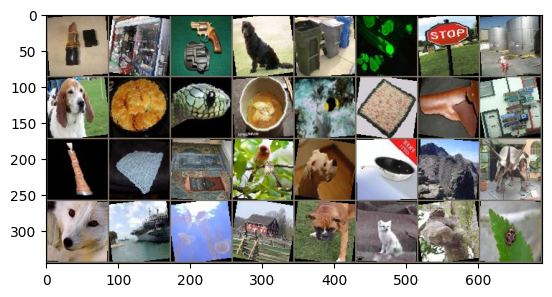

In [ ]:
import torchvision
import numpy as np
# Display some images to show if DataLoaders have been defined correctly

def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(train_loader))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out)

#### 1.2.1.2: Choose a model architecture (ResNet18 without pre-trained weights)

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import models

# Training parameters
epochs = 20
learning_rate = 0.001
momentum = 0.9

# Lists to track performance
torch_train_loss, torch_valid_loss = [], []
torch_train_acc, torch_valid_acc = [], []

# Model Name
model_name = 'resnet18'

# Initialize the model
model = models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(train_dataset.classes))

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

# Move model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


#### 1.2.1.3: Pretrain this model on the training set of miniImageNet.

In [ ]:
def train(model, train_loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(train_loader, desc="Training"):
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    return train_loss, train_acc

def validate(model, valid_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in tqdm(valid_loader, desc="Validation"):
            images, labels = images.to(device), labels.to(device)

            # Forward
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Statistics
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    valid_loss = running_loss / len(valid_loader)
    valid_acc = 100 * correct / total
    return valid_loss, valid_acc


In [ ]:
import os
from tqdm import tqdm

for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    valid_loss, valid_acc = validate(model, valid_loader, criterion, device)

    torch_train_loss.append(train_loss)
    torch_train_acc.append(train_acc)
    torch_valid_loss.append(valid_loss)
    torch_valid_acc.append(valid_acc)

    print(f'Epoch: {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {valid_loss:.4f}, Val Acc: {valid_acc:.2f}%')


Validation: 100%|██████████| 180/180 [00:06<00:00, 26.16it/s]


Epoch: 1/20, Train Loss: 3.8029, Train Acc: 8.44%, Val Loss: 3.4856, Val Acc: 13.63%


Validation: 100%|██████████| 180/180 [00:06<00:00, 28.91it/s]


Epoch: 2/20, Train Loss: 3.2843, Train Acc: 17.66%, Val Loss: 3.1191, Val Acc: 20.87%


Validation: 100%|██████████| 180/180 [00:07<00:00, 22.63it/s]


Epoch: 3/20, Train Loss: 2.9733, Train Acc: 23.90%, Val Loss: 2.8879, Val Acc: 25.38%


Validation: 100%|██████████| 180/180 [00:06<00:00, 26.26it/s]


Epoch: 4/20, Train Loss: 2.7392, Train Acc: 28.79%, Val Loss: 2.6800, Val Acc: 30.56%


Validation: 100%|██████████| 180/180 [00:06<00:00, 28.97it/s]


Epoch: 5/20, Train Loss: 2.5333, Train Acc: 33.74%, Val Loss: 2.5915, Val Acc: 33.00%


Validation: 100%|██████████| 180/180 [00:07<00:00, 25.53it/s]


Epoch: 6/20, Train Loss: 2.3824, Train Acc: 36.63%, Val Loss: 2.5165, Val Acc: 34.65%


Validation: 100%|██████████| 180/180 [00:07<00:00, 24.89it/s]


Epoch: 7/20, Train Loss: 2.2417, Train Acc: 40.10%, Val Loss: 2.4504, Val Acc: 36.37%


Validation: 100%|██████████| 180/180 [00:06<00:00, 29.42it/s]


Epoch: 8/20, Train Loss: 2.1139, Train Acc: 43.17%, Val Loss: 2.3401, Val Acc: 38.40%


Validation: 100%|██████████| 180/180 [00:06<00:00, 28.86it/s]


Epoch: 9/20, Train Loss: 2.0046, Train Acc: 45.58%, Val Loss: 2.2885, Val Acc: 39.90%


Validation: 100%|██████████| 180/180 [00:07<00:00, 24.70it/s]


Epoch: 10/20, Train Loss: 1.9021, Train Acc: 48.11%, Val Loss: 2.2217, Val Acc: 41.25%


Validation: 100%|██████████| 180/180 [00:06<00:00, 26.53it/s]


Epoch: 11/20, Train Loss: 1.7959, Train Acc: 50.84%, Val Loss: 2.2282, Val Acc: 41.58%


Validation: 100%|██████████| 180/180 [00:06<00:00, 29.23it/s]


Epoch: 12/20, Train Loss: 1.7000, Train Acc: 53.26%, Val Loss: 2.2075, Val Acc: 42.76%


Validation: 100%|██████████| 180/180 [00:06<00:00, 26.14it/s]


Epoch: 13/20, Train Loss: 1.6042, Train Acc: 55.47%, Val Loss: 2.2297, Val Acc: 42.17%


Validation: 100%|██████████| 180/180 [00:07<00:00, 24.47it/s]


Epoch: 14/20, Train Loss: 1.5056, Train Acc: 57.97%, Val Loss: 2.1605, Val Acc: 44.20%


Validation: 100%|██████████| 180/180 [00:06<00:00, 28.58it/s]


Epoch: 15/20, Train Loss: 1.4044, Train Acc: 60.67%, Val Loss: 2.2090, Val Acc: 43.26%


Validation: 100%|██████████| 180/180 [00:06<00:00, 27.61it/s]


Epoch: 16/20, Train Loss: 1.3044, Train Acc: 63.24%, Val Loss: 2.2603, Val Acc: 43.09%


Validation: 100%|██████████| 180/180 [00:07<00:00, 23.24it/s]


Epoch: 17/20, Train Loss: 1.2129, Train Acc: 65.87%, Val Loss: 2.3255, Val Acc: 42.20%


Validation: 100%|██████████| 180/180 [00:06<00:00, 26.97it/s]


Epoch: 18/20, Train Loss: 1.1206, Train Acc: 68.40%, Val Loss: 2.2378, Val Acc: 44.17%


Validation: 100%|██████████| 180/180 [00:06<00:00, 29.11it/s]


Epoch: 19/20, Train Loss: 1.0239, Train Acc: 70.64%, Val Loss: 2.3136, Val Acc: 43.21%


Validation: 100%|██████████| 180/180 [00:07<00:00, 24.62it/s]

Epoch: 20/20, Train Loss: 0.9363, Train Acc: 73.08%, Val Loss: 2.3283, Val Acc: 43.73%


#### 1.2.1.4: Evaluate and test the pretrained model on the validation and test sets of miniImageNet.

In [ ]:
# Set the model to evaluation mode
model.eval()

# Disable gradient computation during testing
with torch.no_grad():
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    # Iterate over the test dataset
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Accumulate loss
        total_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    # Calculate average loss and accuracy for the epoch
    test_loss = total_loss / len(test_loader)
    test_acc = (correct_predictions / total_samples) * 100.0

    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%')

Test Loss: 2.3043, Test Accuracy: 44.43%


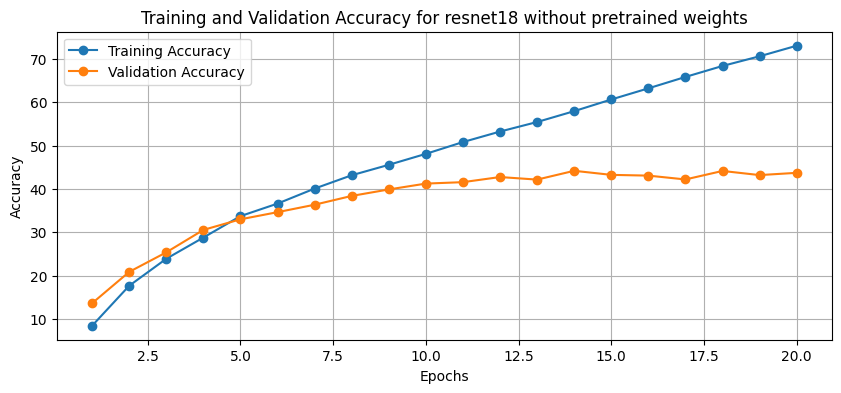

In [ ]:
# This plot shows accuracy for model without any pretrained weights and Training parameters of epochs = 20, learning_rate = 0.001, momentum = 0.9
def plot_accuracy(train_acc, valid_acc, title='Accuracy'):
    epochs = range(1, len(train_acc) + 1)

    plt.figure(figsize=(10, 4))
    plt.plot(epochs, train_acc, label='Training Accuracy', marker='o')
    plt.plot(epochs, valid_acc, label='Validation Accuracy', marker='o')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


# Plot the training and validation accuracy
plot_accuracy(torch_train_acc, torch_valid_acc, title='Training and Validation Accuracy for resnet18 without pretrained weights')

### **1.2.2: Experiment Two: ResNet18 Model with 'IMAGENET1K_V1' pre-trained weights and without resizing image**

#### 1.2.2.1: Choose a model architecture (ResNet18 with weights='IMAGENET1K_V1' )

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import models

# Training parameters
epochs = 8
learning_rate = 0.001
momentum = 0.9

# Lists to track performance
torch_train_loss, torch_valid_loss = [], []
torch_train_acc, torch_valid_acc = [], []

# Model Name
model_name = 'resnet18'

# Initialize the model
model = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(train_dataset.classes))

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

# Move model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 123MB/s]


#### 1.2.2.2: Pretrain this model on the training set of miniImageNet.

In [ ]:
import os
from tqdm import tqdm

for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    valid_loss, valid_acc = validate(model, valid_loader, criterion, device)

    torch_train_loss.append(train_loss)
    torch_train_acc.append(train_acc)
    torch_valid_loss.append(valid_loss)
    torch_valid_acc.append(valid_acc)

    print(f'Epoch: {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {valid_loss:.4f}, Val Acc: {valid_acc:.2f}%')

Validation: 100%|██████████| 180/180 [00:06<00:00, 25.75it/s]


Epoch: 1/8, Train Loss: 1.9193, Train Acc: 51.74%, Val Loss: 1.1963, Val Acc: 67.08%


Validation: 100%|██████████| 180/180 [00:07<00:00, 23.72it/s]


Epoch: 2/8, Train Loss: 1.0473, Train Acc: 70.78%, Val Loss: 1.0523, Val Acc: 69.93%


Validation: 100%|██████████| 180/180 [00:06<00:00, 27.42it/s]


Epoch: 3/8, Train Loss: 0.8380, Train Acc: 76.31%, Val Loss: 1.0094, Val Acc: 72.22%


Validation: 100%|██████████| 180/180 [00:07<00:00, 24.59it/s]


Epoch: 4/8, Train Loss: 0.6918, Train Acc: 79.97%, Val Loss: 0.9996, Val Acc: 71.88%


Validation: 100%|██████████| 180/180 [00:07<00:00, 25.36it/s]


Epoch: 5/8, Train Loss: 0.5810, Train Acc: 83.30%, Val Loss: 0.9905, Val Acc: 72.99%


Validation: 100%|██████████| 180/180 [00:06<00:00, 28.14it/s]


Epoch: 6/8, Train Loss: 0.4849, Train Acc: 85.76%, Val Loss: 1.0105, Val Acc: 73.14%


Validation: 100%|██████████| 180/180 [00:07<00:00, 23.97it/s]


Epoch: 7/8, Train Loss: 0.4101, Train Acc: 87.90%, Val Loss: 1.0377, Val Acc: 72.48%


Validation: 100%|██████████| 180/180 [00:07<00:00, 23.88it/s]

Epoch: 8/8, Train Loss: 0.3502, Train Acc: 89.62%, Val Loss: 1.0441, Val Acc: 73.07%


#### 1.2.2.3: Evaluate and test the pretrained model on the validation and test sets of miniImageNet.

In [ ]:
# Set the model to evaluation mode
model.eval()

# Disable gradient computation during testing
with torch.no_grad():
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    # Iterate over the test dataset
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Accumulate loss
        total_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    # Calculate average loss and accuracy for the epoch
    test_loss = total_loss / len(test_loader)
    test_acc = (correct_predictions / total_samples) * 100.0

    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%')

Test Loss: 1.0659, Test Accuracy: 72.64%


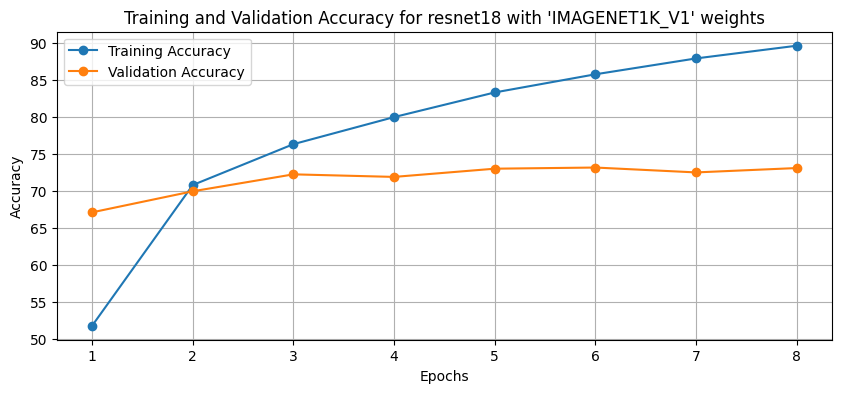

In [ ]:
# This plot shows accuracy for model with pretrained 'IMAGENET1K_V1' weights and Training parameters of epochs = 8, learning_rate = 0.001, momentum = 0.9
def plot_accuracy(train_acc, valid_acc, title='Accuracy'):
    epochs = range(1, len(train_acc) + 1)

    plt.figure(figsize=(10, 4))
    plt.plot(epochs, train_acc, label='Training Accuracy', marker='o')
    plt.plot(epochs, valid_acc, label='Validation Accuracy', marker='o')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


# Plot the training and validation accuracy
plot_accuracy(torch_train_acc, torch_valid_acc, title="Training and Validation Accuracy for resnet18 with 'IMAGENET1K_V1' weights")

### **1.2.3: Experiment Three: ResNet18 Model with 'IMAGENET1K_V1' pre-trained weights and resizing image to [224x224]**

#### 1.2.3.1: creating data loaders by resizing the image.


In [ ]:
from torchvision import datasets, transforms
from torchvision.io import read_image
from torch.utils.data import random_split, DataLoader
from torchvision.datasets import DatasetFolder

transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
])


# Load datasets
train_dataset = datasets.ImageFolder('./miniImagenet_data/split_dataset_output/train', transform=transform)
valid_dataset = datasets.ImageFolder('./miniImagenet_data/split_dataset_output/val', transform=transform)
test_dataset = datasets.ImageFolder('./miniImagenet_data/split_dataset_output/test', transform=transform)

# Create data loaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
print(len(train_loader))
print(len(valid_loader))
print(len(test_loader))

840
180
180


#### 1.2.3.2: Choose a model architecture (ResNet18 with weights='IMAGENET1K_V1')

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import models

# Training parameters
epochs = 8
learning_rate = 0.001
momentum = 0.9

# Lists to track performance
torch_train_loss, torch_valid_loss = [], []
torch_train_acc, torch_valid_acc = [], []

# Model Name
model_name = 'resnet18'

# Initialize the model
model = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(train_dataset.classes))

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

# Move model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)


#### 1.2.3.3: Pretrain this model on the training set of miniImageNet.

In [ ]:
import os
from tqdm import tqdm

best_valid_acc = 0.0  # Initialize the best validation accuracy
best_model_save_path = 'best_model_resnet18.pth'  # Path to save the best model

for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    valid_loss, valid_acc = validate(model, valid_loader, criterion, device)

    torch_train_loss.append(train_loss)
    torch_train_acc.append(train_acc)
    torch_valid_loss.append(valid_loss)
    torch_valid_acc.append(valid_acc)

    print(f'Epoch: {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {valid_loss:.4f}, Val Acc: {valid_acc:.2f}%')

    # Check if the current model is the best one
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(model.state_dict(), best_model_save_path)
        print(f"New best model saved with accuracy: {best_valid_acc:.2f}%")

Validation: 100%|██████████| 180/180 [00:19<00:00,  9.24it/s]


Epoch: 1/8, Train Loss: 1.6930, Train Acc: 62.11%, Val Loss: 0.8156, Val Acc: 78.63%
New best model saved with accuracy: 78.63%


Validation: 100%|██████████| 180/180 [00:20<00:00,  8.97it/s]


Epoch: 2/8, Train Loss: 0.7240, Train Acc: 80.93%, Val Loss: 0.6391, Val Acc: 81.84%
New best model saved with accuracy: 81.84%


Validation: 100%|██████████| 180/180 [00:19<00:00,  9.03it/s]


Epoch: 3/8, Train Loss: 0.5551, Train Acc: 84.84%, Val Loss: 0.5809, Val Acc: 83.11%
New best model saved with accuracy: 83.11%


Validation: 100%|██████████| 180/180 [00:19<00:00,  9.15it/s]


Epoch: 4/8, Train Loss: 0.4490, Train Acc: 87.59%, Val Loss: 0.5764, Val Acc: 83.32%
New best model saved with accuracy: 83.32%


Validation: 100%|██████████| 180/180 [00:18<00:00,  9.65it/s]


Epoch: 5/8, Train Loss: 0.3686, Train Acc: 89.87%, Val Loss: 0.5613, Val Acc: 83.44%
New best model saved with accuracy: 83.44%


Validation: 100%|██████████| 180/180 [00:19<00:00,  9.42it/s]


Epoch: 6/8, Train Loss: 0.3061, Train Acc: 91.88%, Val Loss: 0.5613, Val Acc: 83.82%
New best model saved with accuracy: 83.82%


Validation: 100%|██████████| 180/180 [00:19<00:00,  9.20it/s]


Epoch: 7/8, Train Loss: 0.2567, Train Acc: 93.20%, Val Loss: 0.5622, Val Acc: 84.08%
New best model saved with accuracy: 84.08%


Validation: 100%|██████████| 180/180 [00:18<00:00,  9.57it/s]

Epoch: 8/8, Train Loss: 0.2155, Train Acc: 94.31%, Val Loss: 0.5594, Val Acc: 83.92%


#### 1.2.3.4: Evaluate and test the pretrained model on the validation and test sets of miniImageNet.

In [ ]:
# Set the model to evaluation mode
model.eval()

# Disable gradient computation during testing
with torch.no_grad():
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    # Iterate over the test dataset
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Accumulate loss
        total_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    # Calculate average loss and accuracy for the epoch
    test_loss = total_loss / len(test_loader)
    test_acc = (correct_predictions / total_samples) * 100.0

    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%')

Test Loss: 0.5661, Test Accuracy: 83.89%


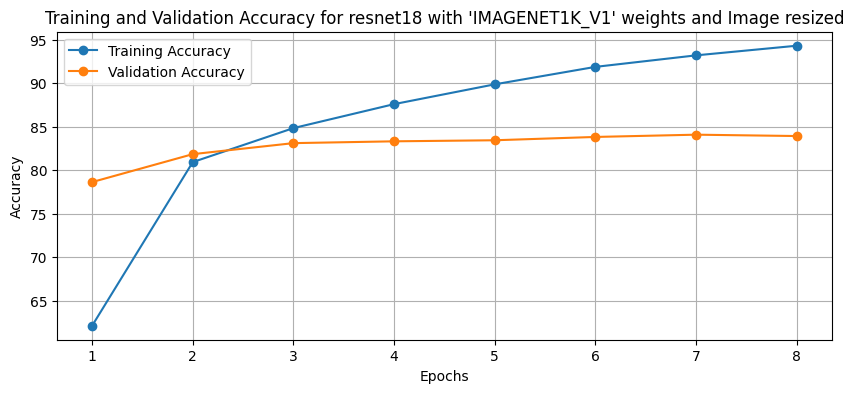

In [ ]:
# This plot shows accuracy for model with pretrained 'IMAGENET1K_V1' weights and Training parameters of epochs = 8, learning_rate = 0.001, momentum = 0.9
def plot_accuracy(train_acc, valid_acc, title='Accuracy'):
    epochs = range(1, len(train_acc) + 1)

    plt.figure(figsize=(10, 4))
    plt.plot(epochs, train_acc, label='Training Accuracy', marker='o')
    plt.plot(epochs, valid_acc, label='Validation Accuracy', marker='o')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


# Plot the training and validation accuracy
plot_accuracy(torch_train_acc, torch_valid_acc, title="Training and Validation Accuracy for resnet18 with 'IMAGENET1K_V1' weights and Image resized")

### **1.2.4: Experiment Four: VGG-16 Model with 'IMAGENET1K_V1' pre-trained weights and resizing image to [224x224]**

#### 1.2.4.1: Choose a model architecture (VGG-16 with weights='IMAGENET1K_V1')

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import models
from tqdm import tqdm

# Training parameters
epochs = 8
learning_rate = 0.001
momentum = 0.9

# Lists to track performance
torch_train_loss, torch_valid_loss = [], []
torch_train_acc, torch_valid_acc = [], []

# Model Name
model_name = 'vgg16'

# Initialize the model
model = models.vgg16(weights='IMAGENET1K_V1')  # Using VGG-16 with pre-trained weights
num_ftrs = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_ftrs, len(train_dataset.classes))  # Replace the last layer

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

# Move model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 116MB/s]


#### 1.2.4.2: Pretrain this model on the training set of miniImageNet.

In [ ]:
best_valid_acc = 0.0  # Initialize the best validation accuracy
best_model_save_path = 'best_model_vgg16.pth'  # Path to save the best model

for epoch in range(epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    valid_loss, valid_acc = validate(model, valid_loader, criterion, device)

    torch_train_loss.append(train_loss)
    torch_train_acc.append(train_acc)
    torch_valid_loss.append(valid_loss)
    torch_valid_acc.append(valid_acc)

    print(f'Epoch: {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {valid_loss:.4f}, Val Acc: {valid_acc:.2f}%')

    # Check if the current model is the best one
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(model.state_dict(), best_model_save_path)
        print(f"New best model saved with accuracy: {best_valid_acc:.2f}%")

Validation: 100%|██████████| 180/180 [00:40<00:00,  4.48it/s]


Epoch: 1/8, Train Loss: 1.3624, Train Acc: 63.68%, Val Loss: 0.8741, Val Acc: 75.10%
New best model saved with accuracy: 75.10%


Validation: 100%|██████████| 180/180 [00:39<00:00,  4.51it/s]


Epoch: 2/8, Train Loss: 0.7931, Train Acc: 77.30%, Val Loss: 0.7597, Val Acc: 78.19%
New best model saved with accuracy: 78.19%


Validation: 100%|██████████| 180/180 [00:40<00:00,  4.47it/s]


Epoch: 3/8, Train Loss: 0.6326, Train Acc: 81.55%, Val Loss: 0.7433, Val Acc: 79.01%
New best model saved with accuracy: 79.01%


Validation: 100%|██████████| 180/180 [00:40<00:00,  4.49it/s]


Epoch: 4/8, Train Loss: 0.5221, Train Acc: 84.60%, Val Loss: 0.6666, Val Acc: 80.71%
New best model saved with accuracy: 80.71%


Validation: 100%|██████████| 180/180 [00:39<00:00,  4.51it/s]


Epoch: 5/8, Train Loss: 0.4342, Train Acc: 86.83%, Val Loss: 0.7240, Val Acc: 80.02%


Validation: 100%|██████████| 180/180 [00:40<00:00,  4.49it/s]


Epoch: 6/8, Train Loss: 0.3776, Train Acc: 88.35%, Val Loss: 0.6696, Val Acc: 81.75%
New best model saved with accuracy: 81.75%


Validation: 100%|██████████| 180/180 [00:39<00:00,  4.52it/s]


Epoch: 7/8, Train Loss: 0.3140, Train Acc: 90.25%, Val Loss: 0.7012, Val Acc: 80.95%


Validation: 100%|██████████| 180/180 [00:39<00:00,  4.50it/s]

Epoch: 8/8, Train Loss: 0.2762, Train Acc: 91.33%, Val Loss: 0.7422, Val Acc: 80.21%


#### 1.2.4.3: Evaluate and test the pretrained model on the validation and test sets of miniImageNet.

In [ ]:
# Set the model to evaluation mode
model.eval()

# Disable gradient computation during testing
with torch.no_grad():
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    # Iterate over the test dataset
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Accumulate loss
        total_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    # Calculate average loss and accuracy for the epoch
    test_loss = total_loss / len(test_loader)
    test_acc = (correct_predictions / total_samples) * 100.0

    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%')


Test Loss: 0.7450, Test Accuracy: 80.14%


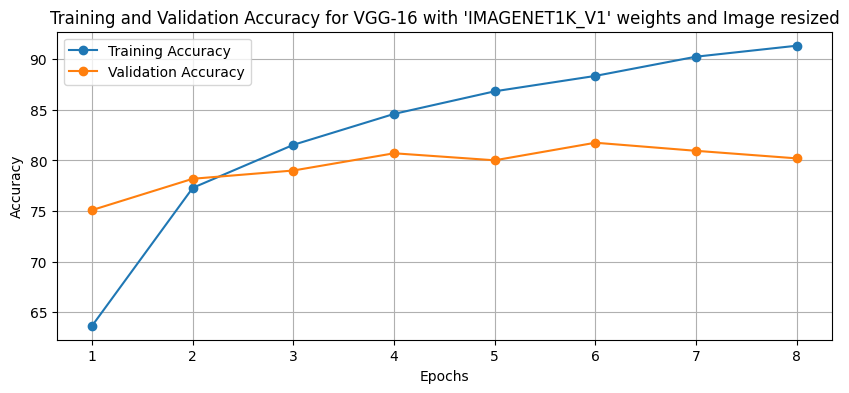

In [ ]:
# This plot shows accuracy for model with pretrained 'IMAGENET1K_V1' weights and Training parameters of epochs = 8, learning_rate = 0.001, momentum = 0.9
def plot_accuracy(train_acc, valid_acc, title='Accuracy'):
    epochs = range(1, len(train_acc) + 1)

    plt.figure(figsize=(10, 4))
    plt.plot(epochs, train_acc, label='Training Accuracy', marker='o')
    plt.plot(epochs, valid_acc, label='Validation Accuracy', marker='o')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


# Plot the training and validation accuracy
plot_accuracy(torch_train_acc, torch_valid_acc, title="Training and Validation Accuracy for VGG-16 with 'IMAGENET1K_V1' weights and Image resized")

## **Task 1.3: EuroSAT Dataset Preparation (3 points)**

### 1.3.1: Download the EuroSAT(RGB) dataset.

In [ ]:
import zipfile
def unzip_file(zip_path, extract_to):
    """
    Unzip a file to a specified directory.
    """
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Extracted {zip_path} to {extract_to}")

# usage
zip_file_path = "/content/drive/MyDrive/EuroSAT (1).zip" #'/content/drive/MyDrive/Deep Learning 2023/dataset/data_DL2023_final_project/EuroSAT.zip'  # Update with your zip file path
extract_to_path = './EuroSAT'  # Update with your desired extraction path

# Create the extraction directory if it doesn't exist
if not os.path.exists(extract_to_path):
    os.makedirs(extract_to_path)

# Unzip the file
unzip_file(zip_file_path, extract_to_path)

Extracted /content/drive/MyDrive/EuroSAT (1).zip to ./EuroSAT


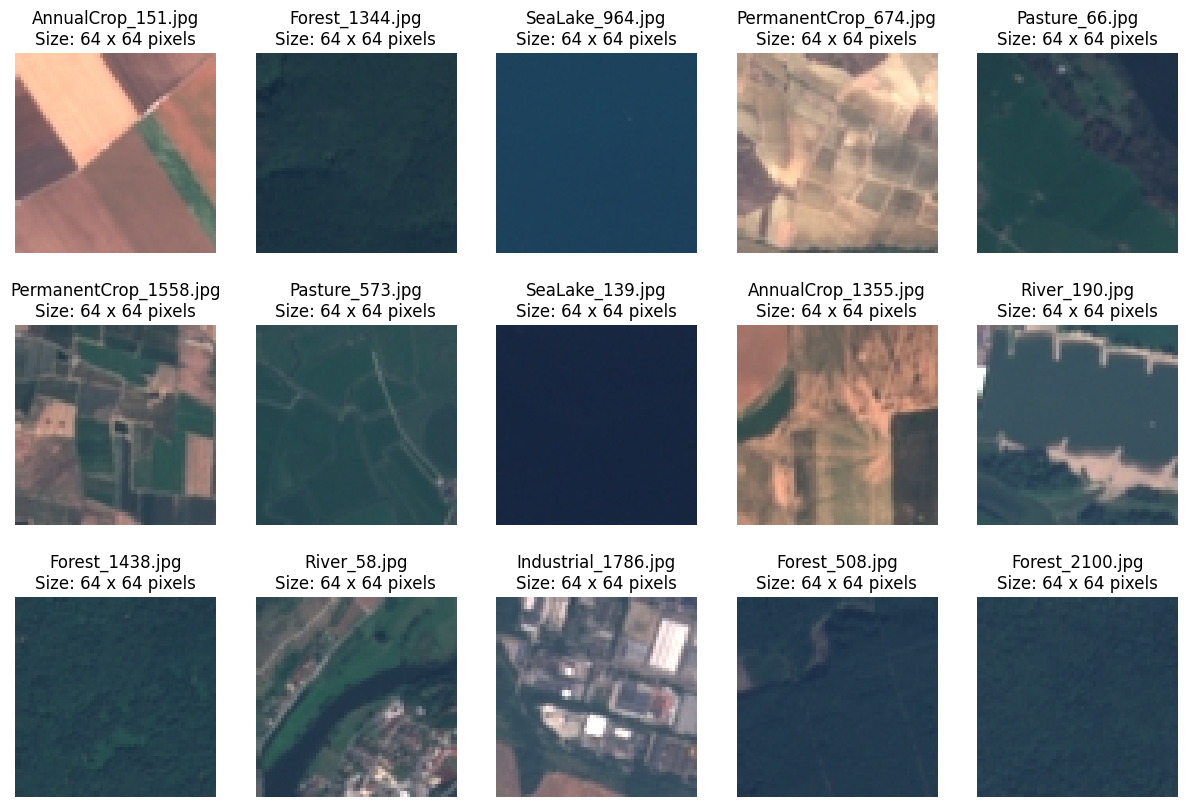

In [ ]:
# Path directory containing images
image_folder_path = "./EuroSAT"

# Display images
display_random_images(image_folder_path)

### 1.3.2: Choose (5) several 100 images from the EuroSAT dataset from 5 different categories (20 samples per category).

In [ ]:
import os
import shutil
import random

def select_images(source_folder, target_folder, num_categories, num_samples_per_category):
    # List all categories (subfolders)
    all_categories = os.listdir(source_folder)

    # Randomly select num_categories categories
    selected_categories = random.sample(all_categories, num_categories)

    for category in selected_categories:
        category_folder = os.path.join(source_folder, category)
        target_category_folder = os.path.join(target_folder, category)

        # Create the target category folder if it doesn't exist
        os.makedirs(target_category_folder, exist_ok=True)

        # List all images in the category
        all_images = os.listdir(category_folder)

        # Randomly select num_samples_per_category images
        selected_images = random.sample(all_images, num_samples_per_category)

        # Copy selected images to the target folder
        for image in selected_images:
            source_path = os.path.join(category_folder, image)
            target_path = os.path.join(target_category_folder, image)
            shutil.copyfile(source_path, target_path)

# Path to the EuroSAT dataset
eurosat_dataset_path = "./EuroSAT/2750"#'/content/drive/MyDrive/Deep Learning 2023/dataset/data_DL2023_final_project/EuroSAT/2750'

# List of target folders
target_folders = [
    "./EuroSAT/target_folder_1",
    "./EuroSAT/target_folder_2",
    "./EuroSAT/target_folder_3",
    "./EuroSAT/target_folder_4",
    "./EuroSAT/target_folder_5"
]

# Specify the number of categories and the number of samples to select from each category
num_selected_categories = 5
num_samples_per_category = 20

# Select and copy the images for each target folder
for target_folder in target_folders:
    select_images(eurosat_dataset_path, target_folder, num_selected_categories, num_samples_per_category)


### 1.3.3: For one selected dataset, randomly select 25 images from these 100, ensuring 5 images from each category as training set and rest 75 images as testing set

In [ ]:
import os
import shutil
import random

def select_images_for_training_and_test(target_folders, num_categories, num_samples_per_category, num_test_samples_per_category):
    training_images = []
    test_images = []

    for target_folder in target_folders:
        categories = os.listdir(target_folder)

        for category in categories:
            category_folder = os.path.join(target_folder, category)

            # List all images in the category
            all_images = os.listdir(category_folder)

            # Randomly select 5 images for training and the rest for the test set
            selected_category_images = random.sample(all_images, num_samples_per_category)

            # Add the selected images to the training list
            training_images.extend(os.path.join(category_folder, image) for image in selected_category_images)

            # Add the remaining images to the test list
            remaining_images = [image for image in all_images if image not in selected_category_images]
            test_images.extend(os.path.join(category_folder, image) for image in remaining_images)

    return training_images, test_images

target_folders = ['./EuroSAT/target_folder_1']

# Specify the number of categories and the number of samples to select from each category
num_selected_categories = 5
num_samples_per_category = 5
num_test_samples_per_category = 15  # Adjust as needed

# Select images for training and test sets
selected_training_images, selected_test_images = select_images_for_training_and_test(
    target_folders, num_selected_categories, num_samples_per_category, num_test_samples_per_category
)


## **Task 1.4: Model Fine-Tuning and Testing (7 points)**

| Pre-trained Model on miniImageNet | Run Number | Training Loss | Test Loss | Training Accuracy (%) | Test Accuracy (%) |
|-----------------------------------|------------|---------------|-----------|-----------------------|-------------------|
| **ResNet-18**                     | 1          | 0.561         | 0.431     | 80.00%                | 85.33%            |
|                                   | 2          | 0.435         | 0.695     | 92.00%                | 76.00%            |
|                                   | 3          | 0.280         | 0.539     | 96.00%                | 81.33%            |
|                                   | 4          | 0.408         | 0.474     | 84.00%                | 82.67%            |
|                                   | 5          | 0.515         | 0.360     | 84.00%                | 86.67%            |
| **ResNet-18 Average**             |            | 0.440         | 0.500     | 87.20%                | 82.40%            |
| **VGG-16**                        | 1          | 0.786         | 1.053     | 64.00%                | 56.00%            |
|                                   | 2          | 1.463         | 1.458     | 28.00%                | 32.00%            |
|                                   | 3          | 0.862         | 0.950     | 64.00%                | 62.67%            |
|                                   | 4          | 1.160         | 1.259     | 60.00%                | 52.00%            |
|                                   | 5          | 1.301         | 1.062     | 48.00%                | 56.00%            |
| **VGG-16 Average**                |            | 1.114         | 1.157     | 52.80%                | 51.73%            |


## 1.4.1: Fine-tune the Resnet-18 pretrained model on EuroSAT images.

#### 1.4.1.1: Creating EuroSAT dataloader.

In [ ]:
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from PIL import Image

def map_categories_to_labels(target_folder):
    categories = os.listdir(target_folder)
    category_to_label = {category: i for i, category in enumerate(categories)}
    return category_to_label

def assign_labels_to_images(image_paths, category_to_label):
    labels = [category_to_label.get(image_path.split('/')[-2], -1) for image_path in image_paths]
    return labels


# Path to your target folder
target_folder = './EuroSAT/target_folder_1'

# Create a mapping from categories to labels
category_to_label = map_categories_to_labels(target_folder)


selected_training_labels = assign_labels_to_images(selected_training_images, category_to_label)

selected_validation_labels = assign_labels_to_images(selected_test_images, category_to_label)

class EuroSATDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]
        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create EuroSATDataset instances
train_dataset = EuroSATDataset(selected_training_images, selected_training_labels, transform)
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True)

# Create EuroSATDataset instances for validation
val_dataset = EuroSATDataset(selected_test_images, selected_validation_labels, transform)
val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

#### 1.4.1.2: Fine-tune Resnet-18 pretrained model on 25 EuroSAT image.

In [ ]:
# Load the Pre-trained Model
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 5)  # Assuming 5 classes in EuroSAT

# Load the pre-trained weights into a variable
checkpoint = torch.load('./best_model_resnet18.pth')

# Remove the fully connected layer weights from the checkpoint
checkpoint.pop('fc.weight', None)
checkpoint.pop('fc.bias', None)

# load the modified state dictionary
model.load_state_dict(checkpoint, strict=False)

# Fine-Tuning Setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training Loop
num_epochs = 7  # Set the number of epochs

# Lists to track performance
train_loss_history, valid_loss_history = [], []
train_acc_history, valid_acc_history = [], []

best_valid_acc = 0.0
best_model_save_path = 'best_fine_tuned_model_resnet18.pth'

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Update correct and total
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate training accuracy at the end of each epoch
    train_loss = running_loss / len(train_loader) if len(train_loader) > 0 else 0
    train_acc = 100 * correct / total if total > 0 else 0

    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    print(f'Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')

Epoch: 1/7, Train Loss: 1.6218, Train Acc: 24.00%
Epoch: 2/7, Train Loss: 1.2351, Train Acc: 56.00%
Epoch: 3/7, Train Loss: 0.9824, Train Acc: 60.00%
Epoch: 4/7, Train Loss: 0.6708, Train Acc: 80.00%
Epoch: 5/7, Train Loss: 0.7506, Train Acc: 80.00%
Epoch: 6/7, Train Loss: 0.2840, Train Acc: 92.00%
Epoch: 7/7, Train Loss: 0.5613, Train Acc: 80.00%


#### 1.4.1.3: Test Fine-tuned Resnet-18 pretrained model on remaining 75 EuroSAT image.

In [ ]:
# Validation Loop
model.eval()
correct_val = 0
total_val = 0
val_loss = 0.0

with torch.no_grad():
    for val_inputs, val_labels in val_loader:
        val_outputs = model(val_inputs)
        val_loss += criterion(val_outputs, val_labels).item()

        _, val_predicted = torch.max(val_outputs.data, 1)
        total_val += val_labels.size(0)
        correct_val += (val_predicted == val_labels).sum().item()

# Calculate and print statistics
valid_loss = val_loss / len(val_loader) if len(val_loader) > 0 else 0
valid_acc = 100 * correct_val / total_val if total_val > 0 else 0

print(f'Validation Loss: {valid_loss:.4f}, Validation Acc: {valid_acc:.2f}%')

# # save the model
torch.save(model.state_dict(), best_model_save_path)

Validation Loss: 0.4314, Validation Acc: 85.33%


#### 1.4.1.4: Visualize the predictions.

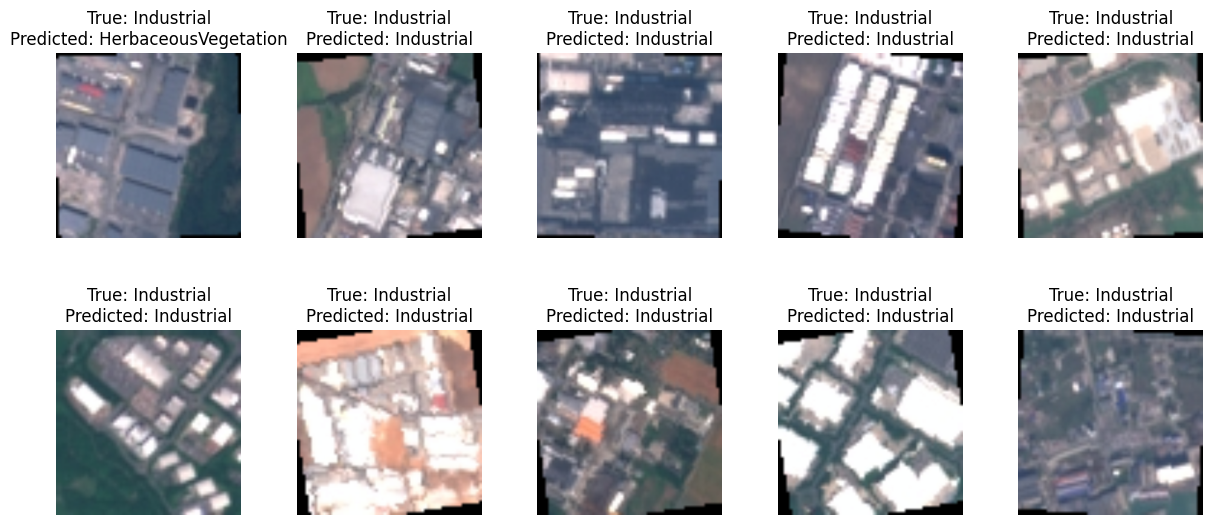

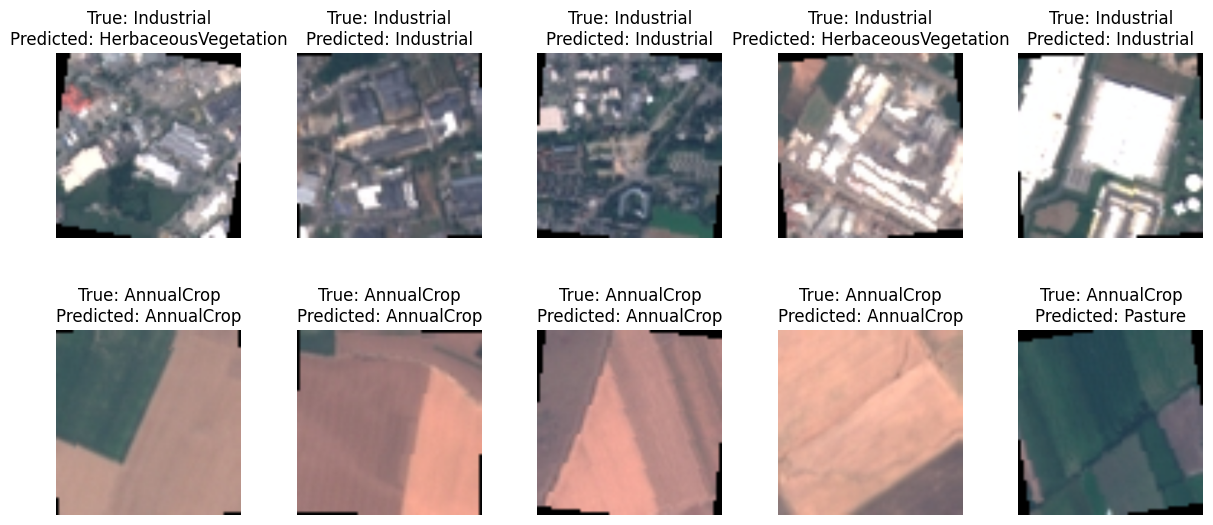

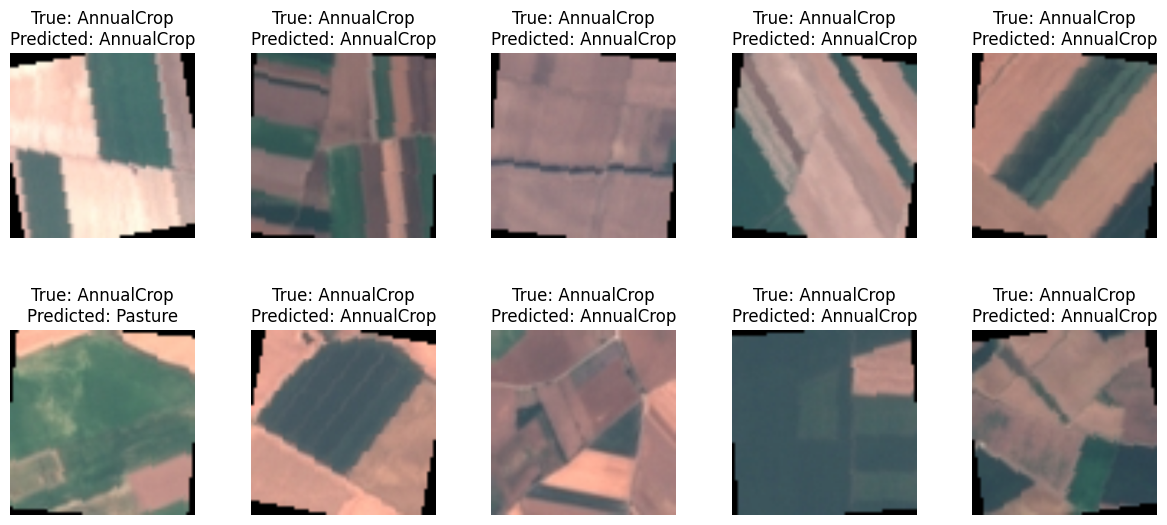

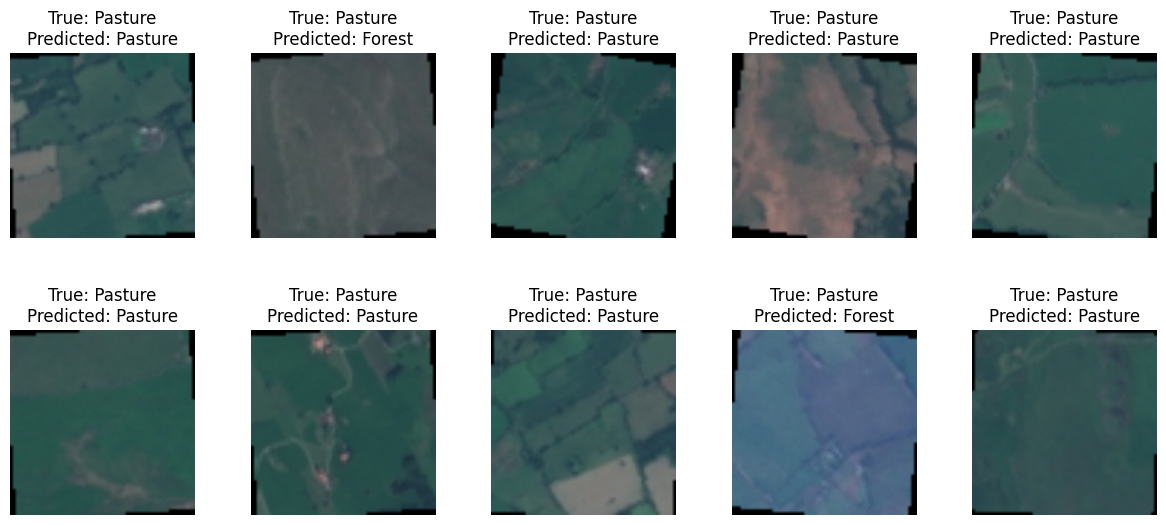

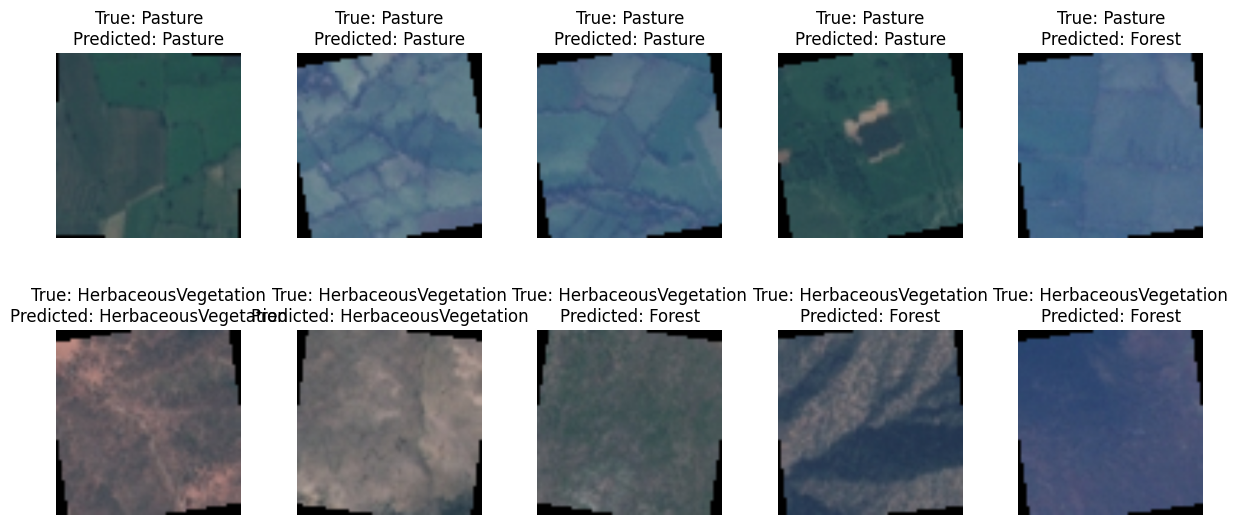

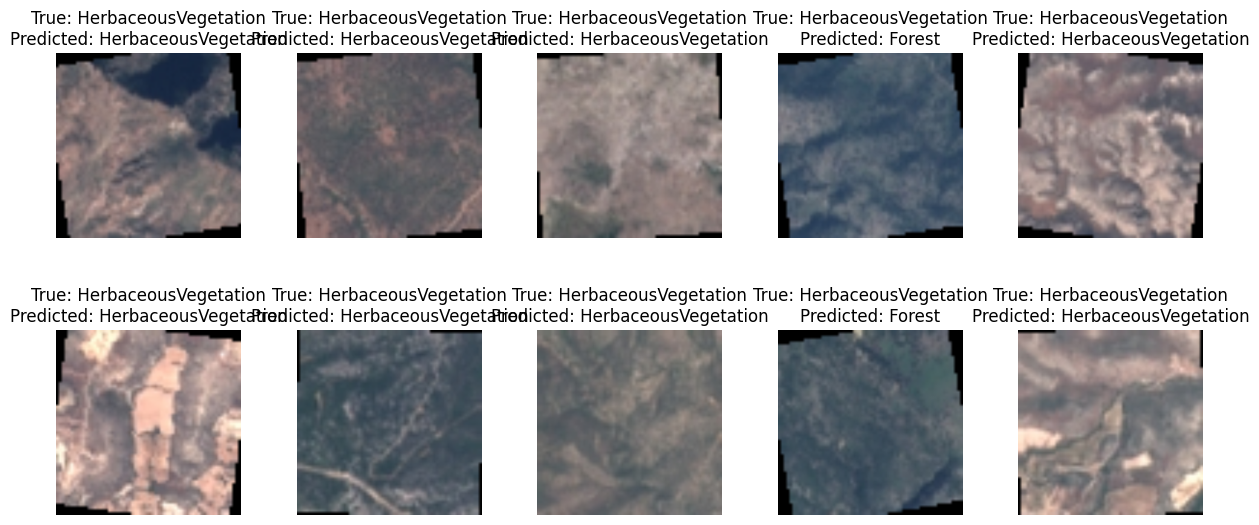

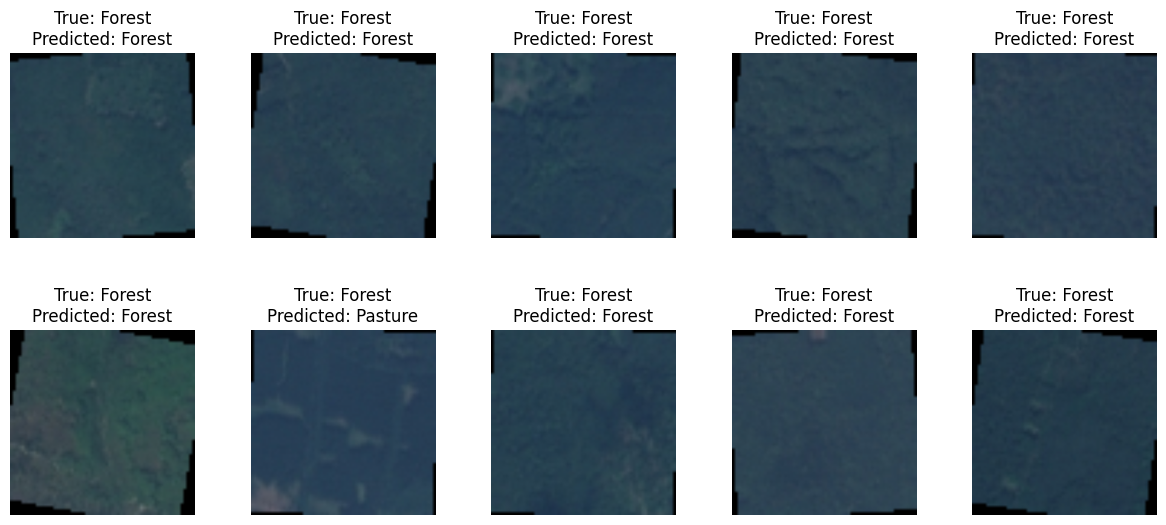

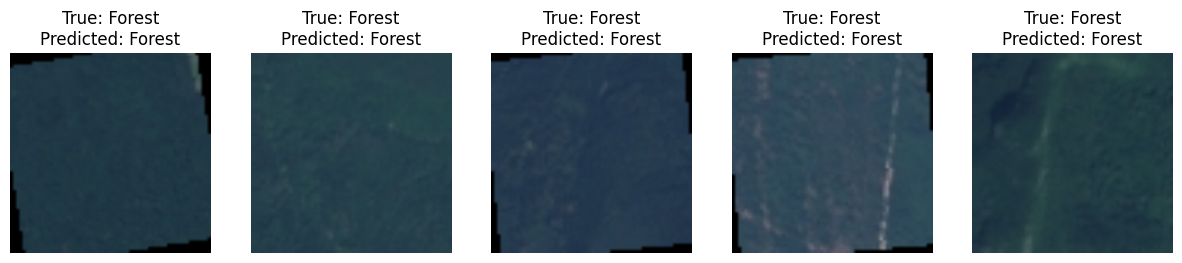

In [ ]:
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import math

# Function to create reverse mapping
def reverse_mapping(category_to_label):
    return {v: k for k, v in category_to_label.items()}

# Create the reverse mapping
label_to_category = reverse_mapping(category_to_label)

def visualize_predictions(images, true_labels, predicted_labels, label_to_category):
    num_images = len(images)
    rows = math.ceil(num_images / 5)  # Assuming 5 columns for better visualization

    fig, axs = plt.subplots(rows, 5, figsize=(15, 3 * rows))
    fig.subplots_adjust(hspace=0.5)

    axs = axs.flatten()  # Flatten the 2D array

    for i in range(num_images):
        true_category = label_to_category.get(true_labels[i].item(), "Unknown")
        predicted_category = label_to_category.get(predicted_labels[i].item(), "Unknown")

        image = images[i].cpu().permute(1, 2, 0).numpy()  # Convert to NumPy array
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

        axs[i].imshow(image)
        axs[i].set_title(f"True: {true_category}\nPredicted: {predicted_category}")
        axs[i].axis('off')

    # Handle case when number of images is less than grid size
    for j in range(num_images, rows * 5):
        axs[j].axis('off')

    plt.show()


# Load the best model for visualization
model.load_state_dict(torch.load("./best_fine_tuned_model_resnet18.pth"))
model.eval()

# Predict and visualize
for images, labels in val_loader:
    with torch.no_grad():
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

    visualize_predictions(images, labels, predicted, label_to_category)

### 1.4.3: Repeat one: fine-tune process on ResNet-18 with different 100 EuroSAT images.

In [ ]:
import os
import shutil
import random
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from PIL import Image


def select_images_for_training_and_test(target_folders, num_categories, num_samples_per_category, num_test_samples_per_category):
    training_images = []
    test_images = []

    for target_folder in target_folders:
        categories = os.listdir(target_folder)

        for category in categories:
            category_folder = os.path.join(target_folder, category)
            all_images = os.listdir(category_folder)
            selected_category_images = random.sample(all_images, num_samples_per_category)
            training_images.extend(os.path.join(category_folder, image) for image in selected_category_images)
            remaining_images = [image for image in all_images if image not in selected_category_images]
            test_images.extend(os.path.join(category_folder, image) for image in remaining_images)

    return training_images, test_images

target_folders = ['./EuroSAT/target_folder_2']

# Specify the number of categories and the number of samples to select from each category
num_selected_categories = 5
num_samples_per_category = 5
num_test_samples_per_category = 15  # Adjust as needed

selected_training_images, selected_test_images = select_images_for_training_and_test(
    target_folders, num_selected_categories, num_samples_per_category, num_test_samples_per_category
)

def map_categories_to_labels(target_folder):
    categories = os.listdir(target_folder)
    category_to_label = {category: i for i, category in enumerate(categories)}
    return category_to_label

def assign_labels_to_images(image_paths, category_to_label):
    labels = [category_to_label.get(image_path.split('/')[-2], -1) for image_path in image_paths]
    return labels

# Path to your target folder
target_folder = './EuroSAT/target_folder_2'


category_to_label = map_categories_to_labels(target_folder)


selected_training_labels = assign_labels_to_images(selected_training_images, category_to_label)

selected_validation_labels = assign_labels_to_images(selected_test_images, category_to_label)

class EuroSATDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]
        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


# Create EuroSATDataset instances
train_dataset = EuroSATDataset(selected_training_images, selected_training_labels, transform)
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True)

# Create EuroSATDataset instances for validation
val_dataset = EuroSATDataset(selected_test_images, selected_validation_labels, transform)
val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

In [ ]:
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 5)

checkpoint = torch.load('./best_model_resnet18.pth')

checkpoint.pop('fc.weight', None)
checkpoint.pop('fc.bias', None)

model.load_state_dict(checkpoint, strict=False)


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 7

train_loss_history, valid_loss_history = [], []
train_acc_history, valid_acc_history = [], []

best_valid_acc = 0.0
best_model_save_path = 'best_fine_tuned_model_resnet18_repeat_one.pth'


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader) if len(train_loader) > 0 else 0
    train_acc = 100 * correct / total if total > 0 else 0

    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    print(f'Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')


Epoch: 1/7, Train Loss: 1.5382, Train Acc: 32.00%
Epoch: 2/7, Train Loss: 1.3600, Train Acc: 44.00%
Epoch: 3/7, Train Loss: 0.9557, Train Acc: 76.00%
Epoch: 4/7, Train Loss: 0.9651, Train Acc: 68.00%
Epoch: 5/7, Train Loss: 0.5473, Train Acc: 84.00%
Epoch: 6/7, Train Loss: 0.4843, Train Acc: 92.00%
Epoch: 7/7, Train Loss: 0.4349, Train Acc: 92.00%


In [ ]:
model.eval()
correct_val = 0
total_val = 0
val_loss = 0.0

with torch.no_grad():
    for val_inputs, val_labels in val_loader:
        val_outputs = model(val_inputs)
        val_loss += criterion(val_outputs, val_labels).item()

        _, val_predicted = torch.max(val_outputs.data, 1)
        total_val += val_labels.size(0)
        correct_val += (val_predicted == val_labels).sum().item()

valid_loss = val_loss / len(val_loader) if len(val_loader) > 0 else 0
valid_acc = 100 * correct_val / total_val if total_val > 0 else 0

valid_loss_history.append(valid_loss)
valid_acc_history.append(valid_acc)

print(f'Validation Loss: {valid_loss:.4f}, Validation Acc: {valid_acc:.2f}%')

torch.save(model.state_dict(), best_model_save_path)

Validation Loss: 0.6947, Validation Acc: 76.00%


### 1.4.4: Repeat Two: fine-tune process on ResNet-18 with different 100 EuroSAT images.

In [ ]:
import os
import shutil
import random
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from PIL import Image


def select_images_for_training_and_test(target_folders, num_categories, num_samples_per_category, num_test_samples_per_category):
    training_images = []
    test_images = []

    for target_folder in target_folders:
        categories = os.listdir(target_folder)

        for category in categories:
            category_folder = os.path.join(target_folder, category)

            # List all images in the category
            all_images = os.listdir(category_folder)

            # Randomly select 5 images for training and the rest for the test set
            selected_category_images = random.sample(all_images, num_samples_per_category)

            # Add the selected images to the training list
            training_images.extend(os.path.join(category_folder, image) for image in selected_category_images)

            # Add the remaining images to the test list
            remaining_images = [image for image in all_images if image not in selected_category_images]
            test_images.extend(os.path.join(category_folder, image) for image in remaining_images)

    return training_images, test_images

target_folders = ['./EuroSAT/target_folder_3']

# Specify the number of categories and the number of samples to select from each category
num_selected_categories = 5
num_samples_per_category = 5
num_test_samples_per_category = 15  # Adjust as needed

# Select images for training and test sets
selected_training_images, selected_test_images = select_images_for_training_and_test(
    target_folders, num_selected_categories, num_samples_per_category, num_test_samples_per_category
)

# Step 1: Map Categories to Labels
def map_categories_to_labels(target_folder):
    categories = os.listdir(target_folder)
    category_to_label = {category: i for i, category in enumerate(categories)}
    return category_to_label

# Step 2: Assign Labels to Images
def assign_labels_to_images(image_paths, category_to_label):
    labels = [category_to_label.get(image_path.split('/')[-2], -1) for image_path in image_paths]
    return labels

# Path to your target folder
target_folder = './EuroSAT/target_folder_3'

# Create a mapping from categories to labels
category_to_label = map_categories_to_labels(target_folder)

# Assuming selected_training_images contains paths to your training images
selected_training_labels = assign_labels_to_images(selected_training_images, category_to_label)
# Assuming selected_validation_images contains paths to your validation images
selected_validation_labels = assign_labels_to_images(selected_test_images, category_to_label)

class EuroSATDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        # self.category_to_label = category_to_label # Store the mapping as an attribute
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        # image = torchvision.io.read_image(image_path)
        # image = image.float() / 255.0  # Normalize to [0, 1]

        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]
        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


# Create EuroSATDataset instances
train_dataset = EuroSATDataset(selected_training_images, selected_training_labels, transform)
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True)

# Create EuroSATDataset instances for validation
val_dataset = EuroSATDataset(selected_test_images, selected_validation_labels, transform)
val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

In [ ]:
# Step 2: Load the Pre-trained Model
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 5)  # Assuming 5 classes in EuroSAT

# Load the pre-trained weights into a variable
checkpoint = torch.load('./best_model_resnet18.pth')

# Remove the fully connected layer weights from the checkpoint
checkpoint.pop('fc.weight', None)
checkpoint.pop('fc.bias', None)

# Now load the modified state dictionary
model.load_state_dict(checkpoint, strict=False)

# Step 3: Fine-Tuning Setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) #Validation Acc: 86.67%
#optim.Adam(model.parameters(), lr=0.001) - accuracy got Validation Acc: 69.33%

# Step 4: Training Loop
num_epochs = 7  # Set the number of epochs

# Lists to track performance
train_loss_history, valid_loss_history = [], []
train_acc_history, valid_acc_history = [], []

best_valid_acc = 0.0  # Initialize the best validation accuracy
best_model_save_path = 'best_fine_tuned_model_resnet18_repeat_two.pth'  # Path to save the best model

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Update correct and total
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate training accuracy at the end of each epoch
    train_loss = running_loss / len(train_loader) if len(train_loader) > 0 else 0
    train_acc = 100 * correct / total if total > 0 else 0

    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    print(f'Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')


Epoch: 1/7, Train Loss: 1.5706, Train Acc: 24.00%
Epoch: 2/7, Train Loss: 1.2947, Train Acc: 56.00%
Epoch: 3/7, Train Loss: 0.9676, Train Acc: 64.00%
Epoch: 4/7, Train Loss: 0.6649, Train Acc: 76.00%
Epoch: 5/7, Train Loss: 0.4098, Train Acc: 92.00%
Epoch: 6/7, Train Loss: 0.4180, Train Acc: 92.00%
Epoch: 7/7, Train Loss: 0.2804, Train Acc: 96.00%


In [ ]:
# Validation Loop
model.eval()
correct_val = 0
total_val = 0
val_loss = 0.0

with torch.no_grad():
    for val_inputs, val_labels in val_loader:
        val_outputs = model(val_inputs)
        val_loss += criterion(val_outputs, val_labels).item()

        _, val_predicted = torch.max(val_outputs.data, 1)
        total_val += val_labels.size(0)
        correct_val += (val_predicted == val_labels).sum().item()

# Calculate and print statistics
valid_loss = val_loss / len(val_loader) if len(val_loader) > 0 else 0
valid_acc = 100 * correct_val / total_val if total_val > 0 else 0

valid_loss_history.append(valid_loss)
valid_acc_history.append(valid_acc)

print(f'Validation Loss: {valid_loss:.4f}, Validation Acc: {valid_acc:.2f}%')

# # save the model
torch.save(model.state_dict(), best_model_save_path)

Validation Loss: 0.5394, Validation Acc: 81.33%


### 1.4.5: Repeat Three: fine-tune process on ResNet-18 with different 100 EuroSAT images.

In [ ]:
import os
import shutil
import random
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from PIL import Image


def select_images_for_training_and_test(target_folders, num_categories, num_samples_per_category, num_test_samples_per_category):
    training_images = []
    test_images = []

    for target_folder in target_folders:
        categories = os.listdir(target_folder)

        for category in categories:
            category_folder = os.path.join(target_folder, category)

            # List all images in the category
            all_images = os.listdir(category_folder)

            # Randomly select 5 images for training and the rest for the test set
            selected_category_images = random.sample(all_images, num_samples_per_category)

            # Add the selected images to the training list
            training_images.extend(os.path.join(category_folder, image) for image in selected_category_images)

            # Add the remaining images to the test list
            remaining_images = [image for image in all_images if image not in selected_category_images]
            test_images.extend(os.path.join(category_folder, image) for image in remaining_images)

    return training_images, test_images

target_folders = ['./EuroSAT/target_folder_4']

# Specify the number of categories and the number of samples to select from each category
num_selected_categories = 5
num_samples_per_category = 5
num_test_samples_per_category = 15  # Adjust as needed

# Select images for training and test sets
selected_training_images, selected_test_images = select_images_for_training_and_test(
    target_folders, num_selected_categories, num_samples_per_category, num_test_samples_per_category
)

# Step 1: Map Categories to Labels
def map_categories_to_labels(target_folder):
    categories = os.listdir(target_folder)
    category_to_label = {category: i for i, category in enumerate(categories)}
    return category_to_label

# Step 2: Assign Labels to Images
def assign_labels_to_images(image_paths, category_to_label):
    labels = [category_to_label.get(image_path.split('/')[-2], -1) for image_path in image_paths]
    return labels

# Path to your target folder
target_folder = './EuroSAT/target_folder_4'

# Create a mapping from categories to labels
category_to_label = map_categories_to_labels(target_folder)

# Assuming selected_training_images contains paths to your training images
selected_training_labels = assign_labels_to_images(selected_training_images, category_to_label)
# Assuming selected_validation_images contains paths to your validation images
selected_validation_labels = assign_labels_to_images(selected_test_images, category_to_label)

class EuroSATDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        # self.category_to_label = category_to_label # Store the mapping as an attribute
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        # image = torchvision.io.read_image(image_path)
        # image = image.float() / 255.0  # Normalize to [0, 1]

        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]
        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


# Create EuroSATDataset instances
train_dataset = EuroSATDataset(selected_training_images, selected_training_labels, transform)
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True)

# Create EuroSATDataset instances for validation
val_dataset = EuroSATDataset(selected_test_images, selected_validation_labels, transform)
val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

In [ ]:
# Step 2: Load the Pre-trained Model
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 5)  # Assuming 5 classes in EuroSAT

# Load the pre-trained weights into a variable
checkpoint = torch.load('./best_model_resnet18.pth')

# Remove the fully connected layer weights from the checkpoint
checkpoint.pop('fc.weight', None)
checkpoint.pop('fc.bias', None)

# Now load the modified state dictionary
model.load_state_dict(checkpoint, strict=False)

# Step 3: Fine-Tuning Setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) #Validation Acc: 86.67%
#optim.Adam(model.parameters(), lr=0.001) - accuracy got Validation Acc: 69.33%

# Step 4: Training Loop
num_epochs = 7  # Set the number of epochs

# Lists to track performance
train_loss_history, valid_loss_history = [], []
train_acc_history, valid_acc_history = [], []

best_valid_acc = 0.0  # Initialize the best validation accuracy
best_model_save_path = 'best_fine_tuned_model_resnet18_repeat_three.pth'  # Path to save the best model

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Update correct and total
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate training accuracy at the end of each epoch
    train_loss = running_loss / len(train_loader) if len(train_loader) > 0 else 0
    train_acc = 100 * correct / total if total > 0 else 0

    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    print(f'Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')


Epoch: 1/7, Train Loss: 1.7217, Train Acc: 20.00%
Epoch: 2/7, Train Loss: 1.3076, Train Acc: 68.00%
Epoch: 3/7, Train Loss: 1.0112, Train Acc: 56.00%
Epoch: 4/7, Train Loss: 0.7474, Train Acc: 88.00%
Epoch: 5/7, Train Loss: 0.3465, Train Acc: 96.00%
Epoch: 6/7, Train Loss: 0.3826, Train Acc: 92.00%
Epoch: 7/7, Train Loss: 0.4083, Train Acc: 84.00%


In [ ]:
# Validation Loop
model.eval()
correct_val = 0
total_val = 0
val_loss = 0.0

with torch.no_grad():
    for val_inputs, val_labels in val_loader:
        val_outputs = model(val_inputs)
        val_loss += criterion(val_outputs, val_labels).item()

        _, val_predicted = torch.max(val_outputs.data, 1)
        total_val += val_labels.size(0)
        correct_val += (val_predicted == val_labels).sum().item()

# Calculate and print statistics
valid_loss = val_loss / len(val_loader) if len(val_loader) > 0 else 0
valid_acc = 100 * correct_val / total_val if total_val > 0 else 0

valid_loss_history.append(valid_loss)
valid_acc_history.append(valid_acc)

print(f'Validation Loss: {valid_loss:.4f}, Validation Acc: {valid_acc:.2f}%')

# # save the model
torch.save(model.state_dict(), best_model_save_path)

Validation Loss: 0.4744, Validation Acc: 82.67%


### 1.4.6: Repeat four: fine-tune process on ResNet-18 with different 100 EuroSAT images.

In [ ]:
import os
import shutil
import random
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from PIL import Image


def select_images_for_training_and_test(target_folders, num_categories, num_samples_per_category, num_test_samples_per_category):
    training_images = []
    test_images = []

    for target_folder in target_folders:
        categories = os.listdir(target_folder)

        for category in categories:
            category_folder = os.path.join(target_folder, category)

            # List all images in the category
            all_images = os.listdir(category_folder)

            # Randomly select 5 images for training and the rest for the test set
            selected_category_images = random.sample(all_images, num_samples_per_category)

            # Add the selected images to the training list
            training_images.extend(os.path.join(category_folder, image) for image in selected_category_images)

            # Add the remaining images to the test list
            remaining_images = [image for image in all_images if image not in selected_category_images]
            test_images.extend(os.path.join(category_folder, image) for image in remaining_images)

    return training_images, test_images

target_folders = ['./EuroSAT/target_folder_5']

# Specify the number of categories and the number of samples to select from each category
num_selected_categories = 5
num_samples_per_category = 5
num_test_samples_per_category = 15  # Adjust as needed

# Select images for training and test sets
selected_training_images, selected_test_images = select_images_for_training_and_test(
    target_folders, num_selected_categories, num_samples_per_category, num_test_samples_per_category
)

# Step 1: Map Categories to Labels
def map_categories_to_labels(target_folder):
    categories = os.listdir(target_folder)
    category_to_label = {category: i for i, category in enumerate(categories)}
    return category_to_label

# Step 2: Assign Labels to Images
def assign_labels_to_images(image_paths, category_to_label):
    labels = [category_to_label.get(image_path.split('/')[-2], -1) for image_path in image_paths]
    return labels

# Path to your target folder
target_folder = './EuroSAT/target_folder_5'

# Create a mapping from categories to labels
category_to_label = map_categories_to_labels(target_folder)

# Assuming selected_training_images contains paths to your training images
selected_training_labels = assign_labels_to_images(selected_training_images, category_to_label)
# Assuming selected_validation_images contains paths to your validation images
selected_validation_labels = assign_labels_to_images(selected_test_images, category_to_label)

class EuroSATDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        # self.category_to_label = category_to_label # Store the mapping as an attribute
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        # image = torchvision.io.read_image(image_path)
        # image = image.float() / 255.0  # Normalize to [0, 1]

        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]
        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


# Create EuroSATDataset instances
train_dataset = EuroSATDataset(selected_training_images, selected_training_labels, transform)
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True)

# Create EuroSATDataset instances for validation
val_dataset = EuroSATDataset(selected_test_images, selected_validation_labels, transform)
val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

In [ ]:
# Step 2: Load the Pre-trained Model
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 5)  # Assuming 5 classes in EuroSAT

# Load the pre-trained weights into a variable
checkpoint = torch.load('./best_model_resnet18.pth')

# Remove the fully connected layer weights from the checkpoint
checkpoint.pop('fc.weight', None)
checkpoint.pop('fc.bias', None)

# Now load the modified state dictionary
model.load_state_dict(checkpoint, strict=False)

# Step 3: Fine-Tuning Setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) #Validation Acc: 86.67%
#optim.Adam(model.parameters(), lr=0.001) - accuracy got Validation Acc: 69.33%

# Step 4: Training Loop
num_epochs = 7  # Set the number of epochs

# Lists to track performance
train_loss_history, valid_loss_history = [], []
train_acc_history, valid_acc_history = [], []

best_valid_acc = 0.0  # Initialize the best validation accuracy
best_model_save_path = 'best_fine_tuned_model_resnet18_repeat_four.pth'  # Path to save the best model

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Update correct and total
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate training accuracy at the end of each epoch
    train_loss = running_loss / len(train_loader) if len(train_loader) > 0 else 0
    train_acc = 100 * correct / total if total > 0 else 0

    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    print(f'Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')


Epoch: 1/7, Train Loss: 1.6823, Train Acc: 20.00%
Epoch: 2/7, Train Loss: 1.4214, Train Acc: 44.00%
Epoch: 3/7, Train Loss: 0.8818, Train Acc: 68.00%
Epoch: 4/7, Train Loss: 0.6649, Train Acc: 88.00%
Epoch: 5/7, Train Loss: 0.4748, Train Acc: 92.00%
Epoch: 6/7, Train Loss: 0.9497, Train Acc: 68.00%
Epoch: 7/7, Train Loss: 0.5152, Train Acc: 84.00%


In [ ]:
# Validation Loop
model.eval()
correct_val = 0
total_val = 0
val_loss = 0.0

with torch.no_grad():
    for val_inputs, val_labels in val_loader:
        val_outputs = model(val_inputs)
        val_loss += criterion(val_outputs, val_labels).item()

        _, val_predicted = torch.max(val_outputs.data, 1)
        total_val += val_labels.size(0)
        correct_val += (val_predicted == val_labels).sum().item()

# Calculate and print statistics
valid_loss = val_loss / len(val_loader) if len(val_loader) > 0 else 0
valid_acc = 100 * correct_val / total_val if total_val > 0 else 0

valid_loss_history.append(valid_loss)
valid_acc_history.append(valid_acc)

print(f'Validation Loss: {valid_loss:.4f}, Validation Acc: {valid_acc:.2f}%')

# # save the model
torch.save(model.state_dict(), best_model_save_path)

Validation Loss: 0.3601, Validation Acc: 86.67%


## 1.4.2: Fine-tune the VGG-16 pretrained model on EuroSAT images.

### 1.4.2.1: Fine-tune

In [ ]:
import os
import shutil
import random
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from PIL import Image


def select_images_for_training_and_test(target_folders, num_categories, num_samples_per_category, num_test_samples_per_category):
    training_images = []
    test_images = []

    for target_folder in target_folders:
        categories = os.listdir(target_folder)

        for category in categories:
            category_folder = os.path.join(target_folder, category)

            # List all images in the category
            all_images = os.listdir(category_folder)

            # Randomly select 5 images for training and the rest for the test set
            selected_category_images = random.sample(all_images, num_samples_per_category)

            # Add the selected images to the training list
            training_images.extend(os.path.join(category_folder, image) for image in selected_category_images)

            # Add the remaining images to the test list
            remaining_images = [image for image in all_images if image not in selected_category_images]
            test_images.extend(os.path.join(category_folder, image) for image in remaining_images)

    return training_images, test_images

target_folders = ['./EuroSAT/target_folder_1']

# Specify the number of categories and the number of samples to select from each category
num_selected_categories = 5
num_samples_per_category = 5
num_test_samples_per_category = 15  # Adjust as needed

# Select images for training and test sets
selected_training_images, selected_test_images = select_images_for_training_and_test(
    target_folders, num_selected_categories, num_samples_per_category, num_test_samples_per_category
)

# Step 1: Map Categories to Labels
def map_categories_to_labels(target_folder):
    categories = os.listdir(target_folder)
    category_to_label = {category: i for i, category in enumerate(categories)}
    return category_to_label

# Step 2: Assign Labels to Images
def assign_labels_to_images(image_paths, category_to_label):
    labels = [category_to_label.get(image_path.split('/')[-2], -1) for image_path in image_paths]
    return labels

# Path to your target folder
target_folder = './EuroSAT/target_folder_1'

# Create a mapping from categories to labels
category_to_label = map_categories_to_labels(target_folder)

# Assuming selected_training_images contains paths to your training images
selected_training_labels = assign_labels_to_images(selected_training_images, category_to_label)
# Assuming selected_validation_images contains paths to your validation images
selected_validation_labels = assign_labels_to_images(selected_test_images, category_to_label)

class EuroSATDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        # self.category_to_label = category_to_label # Store the mapping as an attribute
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        # image = torchvision.io.read_image(image_path)
        # image = image.float() / 255.0  # Normalize to [0, 1]

        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]
        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


# Create EuroSATDataset instances
train_dataset = EuroSATDataset(selected_training_images, selected_training_labels, transform)
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True)

# Create EuroSATDataset instances for validation
val_dataset = EuroSATDataset(selected_test_images, selected_validation_labels, transform)
val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

In [ ]:
# Step 2: Load the Pre-trained Model
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 5)  # Assuming 5 classes in EuroSAT

# Load the pre-trained weights into a variable
checkpoint = torch.load('./best_model_vgg16.pth')

# Remove the fully connected layer weights from the checkpoint
checkpoint.pop('fc.weight', None)
checkpoint.pop('fc.bias', None)

# Now load the modified state dictionary
model.load_state_dict(checkpoint, strict=False)

# Step 3: Fine-Tuning Setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) #Validation Acc: 86.67%
#optim.Adam(model.parameters(), lr=0.001) - accuracy got Validation Acc: 69.33%

# Step 4: Training Loop
num_epochs = 7  # Set the number of epochs

# Lists to track performance
train_loss_history, valid_loss_history = [], []
train_acc_history, valid_acc_history = [], []

best_valid_acc = 0.0  # Initialize the best validation accuracy
best_model_save_path = 'best_fine_tuned_model_vgg-16.pth'  # Path to save the best model

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Update correct and total
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate training accuracy at the end of each epoch
    train_loss = running_loss / len(train_loader) if len(train_loader) > 0 else 0
    train_acc = 100 * correct / total if total > 0 else 0

    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    print(f'Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')


Epoch: 1/7, Train Loss: 1.7354, Train Acc: 28.00%
Epoch: 2/7, Train Loss: 1.4315, Train Acc: 48.00%
Epoch: 3/7, Train Loss: 1.2042, Train Acc: 64.00%
Epoch: 4/7, Train Loss: 1.3319, Train Acc: 40.00%
Epoch: 5/7, Train Loss: 1.0434, Train Acc: 56.00%
Epoch: 6/7, Train Loss: 0.8831, Train Acc: 68.00%
Epoch: 7/7, Train Loss: 0.7860, Train Acc: 64.00%


In [ ]:
# Validation Loop
model.eval()
correct_val = 0
total_val = 0
val_loss = 0.0

with torch.no_grad():
    for val_inputs, val_labels in val_loader:
        val_outputs = model(val_inputs)
        val_loss += criterion(val_outputs, val_labels).item()

        _, val_predicted = torch.max(val_outputs.data, 1)
        total_val += val_labels.size(0)
        correct_val += (val_predicted == val_labels).sum().item()

# Calculate and print statistics
valid_loss = val_loss / len(val_loader) if len(val_loader) > 0 else 0
valid_acc = 100 * correct_val / total_val if total_val > 0 else 0

valid_loss_history.append(valid_loss)
valid_acc_history.append(valid_acc)

print(f'Validation Loss: {valid_loss:.4f}, Validation Acc: {valid_acc:.2f}%')

# # save the model
torch.save(model.state_dict(), best_model_save_path)

Validation Loss: 1.0532, Validation Acc: 56.00%


### 1.4.2.2: Fine-tune repeat one

In [ ]:
import os
import shutil
import random
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from PIL import Image


def select_images_for_training_and_test(target_folders, num_categories, num_samples_per_category, num_test_samples_per_category):
    training_images = []
    test_images = []

    for target_folder in target_folders:
        categories = os.listdir(target_folder)

        for category in categories:
            category_folder = os.path.join(target_folder, category)

            # List all images in the category
            all_images = os.listdir(category_folder)

            # Randomly select 5 images for training and the rest for the test set
            selected_category_images = random.sample(all_images, num_samples_per_category)

            # Add the selected images to the training list
            training_images.extend(os.path.join(category_folder, image) for image in selected_category_images)

            # Add the remaining images to the test list
            remaining_images = [image for image in all_images if image not in selected_category_images]
            test_images.extend(os.path.join(category_folder, image) for image in remaining_images)

    return training_images, test_images

target_folders = ['./EuroSAT/target_folder_2']

# Specify the number of categories and the number of samples to select from each category
num_selected_categories = 5
num_samples_per_category = 5
num_test_samples_per_category = 15  # Adjust as needed

# Select images for training and test sets
selected_training_images, selected_test_images = select_images_for_training_and_test(
    target_folders, num_selected_categories, num_samples_per_category, num_test_samples_per_category
)

# Step 1: Map Categories to Labels
def map_categories_to_labels(target_folder):
    categories = os.listdir(target_folder)
    category_to_label = {category: i for i, category in enumerate(categories)}
    return category_to_label

# Step 2: Assign Labels to Images
def assign_labels_to_images(image_paths, category_to_label):
    labels = [category_to_label.get(image_path.split('/')[-2], -1) for image_path in image_paths]
    return labels

# Path to your target folder
target_folder = './EuroSAT/target_folder_2'

# Create a mapping from categories to labels
category_to_label = map_categories_to_labels(target_folder)

# Assuming selected_training_images contains paths to your training images
selected_training_labels = assign_labels_to_images(selected_training_images, category_to_label)
# Assuming selected_validation_images contains paths to your validation images
selected_validation_labels = assign_labels_to_images(selected_test_images, category_to_label)

class EuroSATDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        # self.category_to_label = category_to_label # Store the mapping as an attribute
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        # image = torchvision.io.read_image(image_path)
        # image = image.float() / 255.0  # Normalize to [0, 1]

        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]
        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


# Create EuroSATDataset instances
train_dataset = EuroSATDataset(selected_training_images, selected_training_labels, transform)
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True)

# Create EuroSATDataset instances for validation
val_dataset = EuroSATDataset(selected_test_images, selected_validation_labels, transform)
val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

In [ ]:
# Step 2: Load the Pre-trained Model
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 5)  # Assuming 5 classes in EuroSAT

# Load the pre-trained weights into a variable
checkpoint = torch.load('./best_model_vgg16.pth')

# Remove the fully connected layer weights from the checkpoint
checkpoint.pop('fc.weight', None)
checkpoint.pop('fc.bias', None)

# Now load the modified state dictionary
model.load_state_dict(checkpoint, strict=False)

# Step 3: Fine-Tuning Setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) #Validation Acc: 86.67%
#optim.Adam(model.parameters(), lr=0.001) - accuracy got Validation Acc: 69.33%

# Step 4: Training Loop
num_epochs = 7  # Set the number of epochs

# Lists to track performance
train_loss_history, valid_loss_history = [], []
train_acc_history, valid_acc_history = [], []

best_valid_acc = 0.0  # Initialize the best validation accuracy
best_model_save_path = 'best_fine_tuned_model_vgg-16_one.pth'  # Path to save the best model

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Update correct and total
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate training accuracy at the end of each epoch
    train_loss = running_loss / len(train_loader) if len(train_loader) > 0 else 0
    train_acc = 100 * correct / total if total > 0 else 0

    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    print(f'Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')


Epoch: 1/7, Train Loss: 1.7085, Train Acc: 8.00%
Epoch: 2/7, Train Loss: 1.6639, Train Acc: 32.00%
Epoch: 3/7, Train Loss: 1.4597, Train Acc: 24.00%
Epoch: 4/7, Train Loss: 1.3699, Train Acc: 36.00%
Epoch: 5/7, Train Loss: 1.5309, Train Acc: 32.00%
Epoch: 6/7, Train Loss: 1.3663, Train Acc: 48.00%
Epoch: 7/7, Train Loss: 1.4627, Train Acc: 28.00%


In [ ]:
# Validation Loop
model.eval()
correct_val = 0
total_val = 0
val_loss = 0.0

with torch.no_grad():
    for val_inputs, val_labels in val_loader:
        val_outputs = model(val_inputs)
        val_loss += criterion(val_outputs, val_labels).item()

        _, val_predicted = torch.max(val_outputs.data, 1)
        total_val += val_labels.size(0)
        correct_val += (val_predicted == val_labels).sum().item()

# Calculate and print statistics
valid_loss = val_loss / len(val_loader) if len(val_loader) > 0 else 0
valid_acc = 100 * correct_val / total_val if total_val > 0 else 0

valid_loss_history.append(valid_loss)
valid_acc_history.append(valid_acc)

print(f'Validation Loss: {valid_loss:.4f}, Validation Acc: {valid_acc:.2f}%')

# # save the model
torch.save(model.state_dict(), best_model_save_path)

Validation Loss: 1.4579, Validation Acc: 32.00%


### 1.4.2.3: Fine-tune repeat two

In [ ]:
import os
import shutil
import random
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from PIL import Image


def select_images_for_training_and_test(target_folders, num_categories, num_samples_per_category, num_test_samples_per_category):
    training_images = []
    test_images = []

    for target_folder in target_folders:
        categories = os.listdir(target_folder)

        for category in categories:
            category_folder = os.path.join(target_folder, category)

            # List all images in the category
            all_images = os.listdir(category_folder)

            # Randomly select 5 images for training and the rest for the test set
            selected_category_images = random.sample(all_images, num_samples_per_category)

            # Add the selected images to the training list
            training_images.extend(os.path.join(category_folder, image) for image in selected_category_images)

            # Add the remaining images to the test list
            remaining_images = [image for image in all_images if image not in selected_category_images]
            test_images.extend(os.path.join(category_folder, image) for image in remaining_images)

    return training_images, test_images

target_folders = ['./EuroSAT/target_folder_3']

# Specify the number of categories and the number of samples to select from each category
num_selected_categories = 5
num_samples_per_category = 5
num_test_samples_per_category = 15  # Adjust as needed

# Select images for training and test sets
selected_training_images, selected_test_images = select_images_for_training_and_test(
    target_folders, num_selected_categories, num_samples_per_category, num_test_samples_per_category
)

# Step 1: Map Categories to Labels
def map_categories_to_labels(target_folder):
    categories = os.listdir(target_folder)
    category_to_label = {category: i for i, category in enumerate(categories)}
    return category_to_label

# Step 2: Assign Labels to Images
def assign_labels_to_images(image_paths, category_to_label):
    labels = [category_to_label.get(image_path.split('/')[-2], -1) for image_path in image_paths]
    return labels

# Path to your target folder
target_folder = './EuroSAT/target_folder_3'

# Create a mapping from categories to labels
category_to_label = map_categories_to_labels(target_folder)

# Assuming selected_training_images contains paths to your training images
selected_training_labels = assign_labels_to_images(selected_training_images, category_to_label)
# Assuming selected_validation_images contains paths to your validation images
selected_validation_labels = assign_labels_to_images(selected_test_images, category_to_label)

class EuroSATDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        # self.category_to_label = category_to_label # Store the mapping as an attribute
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        # image = torchvision.io.read_image(image_path)
        # image = image.float() / 255.0  # Normalize to [0, 1]

        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]
        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


# Create EuroSATDataset instances
train_dataset = EuroSATDataset(selected_training_images, selected_training_labels, transform)
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True)

# Create EuroSATDataset instances for validation
val_dataset = EuroSATDataset(selected_test_images, selected_validation_labels, transform)
val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

In [ ]:
# Step 2: Load the Pre-trained Model
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 5)  # Assuming 5 classes in EuroSAT

# Load the pre-trained weights into a variable
checkpoint = torch.load('./best_model_vgg16.pth')

# Remove the fully connected layer weights from the checkpoint
checkpoint.pop('fc.weight', None)
checkpoint.pop('fc.bias', None)

# Now load the modified state dictionary
model.load_state_dict(checkpoint, strict=False)

# Step 3: Fine-Tuning Setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) #Validation Acc: 86.67%
#optim.Adam(model.parameters(), lr=0.001) - accuracy got Validation Acc: 69.33%

# Step 4: Training Loop
num_epochs = 7  # Set the number of epochs

# Lists to track performance
train_loss_history, valid_loss_history = [], []
train_acc_history, valid_acc_history = [], []

best_valid_acc = 0.0  # Initialize the best validation accuracy
best_model_save_path = 'best_fine_tuned_model_vgg-16_two.pth'  # Path to save the best model

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Update correct and total
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate training accuracy at the end of each epoch
    train_loss = running_loss / len(train_loader) if len(train_loader) > 0 else 0
    train_acc = 100 * correct / total if total > 0 else 0

    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    print(f'Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')


Epoch: 1/7, Train Loss: 1.6581, Train Acc: 8.00%
Epoch: 2/7, Train Loss: 1.6225, Train Acc: 16.00%
Epoch: 3/7, Train Loss: 1.3570, Train Acc: 52.00%
Epoch: 4/7, Train Loss: 1.3625, Train Acc: 40.00%
Epoch: 5/7, Train Loss: 1.1286, Train Acc: 60.00%
Epoch: 6/7, Train Loss: 1.0957, Train Acc: 64.00%
Epoch: 7/7, Train Loss: 0.8622, Train Acc: 64.00%


In [ ]:
# Validation Loop
model.eval()
correct_val = 0
total_val = 0
val_loss = 0.0

with torch.no_grad():
    for val_inputs, val_labels in val_loader:
        val_outputs = model(val_inputs)
        val_loss += criterion(val_outputs, val_labels).item()

        _, val_predicted = torch.max(val_outputs.data, 1)
        total_val += val_labels.size(0)
        correct_val += (val_predicted == val_labels).sum().item()

# Calculate and print statistics
valid_loss = val_loss / len(val_loader) if len(val_loader) > 0 else 0
valid_acc = 100 * correct_val / total_val if total_val > 0 else 0

valid_loss_history.append(valid_loss)
valid_acc_history.append(valid_acc)

print(f'Validation Loss: {valid_loss:.4f}, Validation Acc: {valid_acc:.2f}%')

# # save the model
torch.save(model.state_dict(), best_model_save_path)

Validation Loss: 0.9503, Validation Acc: 62.67%


### 1.4.2.4: Fine-tune repeat three

In [ ]:
import os
import shutil
import random
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from PIL import Image


def select_images_for_training_and_test(target_folders, num_categories, num_samples_per_category, num_test_samples_per_category):
    training_images = []
    test_images = []

    for target_folder in target_folders:
        categories = os.listdir(target_folder)

        for category in categories:
            category_folder = os.path.join(target_folder, category)

            # List all images in the category
            all_images = os.listdir(category_folder)

            # Randomly select 5 images for training and the rest for the test set
            selected_category_images = random.sample(all_images, num_samples_per_category)

            # Add the selected images to the training list
            training_images.extend(os.path.join(category_folder, image) for image in selected_category_images)

            # Add the remaining images to the test list
            remaining_images = [image for image in all_images if image not in selected_category_images]
            test_images.extend(os.path.join(category_folder, image) for image in remaining_images)

    return training_images, test_images

target_folders = ['./EuroSAT/target_folder_4']

# Specify the number of categories and the number of samples to select from each category
num_selected_categories = 5
num_samples_per_category = 5
num_test_samples_per_category = 15  # Adjust as needed

# Select images for training and test sets
selected_training_images, selected_test_images = select_images_for_training_and_test(
    target_folders, num_selected_categories, num_samples_per_category, num_test_samples_per_category
)

# Step 1: Map Categories to Labels
def map_categories_to_labels(target_folder):
    categories = os.listdir(target_folder)
    category_to_label = {category: i for i, category in enumerate(categories)}
    return category_to_label

# Step 2: Assign Labels to Images
def assign_labels_to_images(image_paths, category_to_label):
    labels = [category_to_label.get(image_path.split('/')[-2], -1) for image_path in image_paths]
    return labels

# Path to your target folder
target_folder = './EuroSAT/target_folder_4'

# Create a mapping from categories to labels
category_to_label = map_categories_to_labels(target_folder)

# Assuming selected_training_images contains paths to your training images
selected_training_labels = assign_labels_to_images(selected_training_images, category_to_label)
# Assuming selected_validation_images contains paths to your validation images
selected_validation_labels = assign_labels_to_images(selected_test_images, category_to_label)

class EuroSATDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        # self.category_to_label = category_to_label # Store the mapping as an attribute
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        # image = torchvision.io.read_image(image_path)
        # image = image.float() / 255.0  # Normalize to [0, 1]

        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]
        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


# Create EuroSATDataset instances
train_dataset = EuroSATDataset(selected_training_images, selected_training_labels, transform)
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True)

# Create EuroSATDataset instances for validation
val_dataset = EuroSATDataset(selected_test_images, selected_validation_labels, transform)
val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

In [ ]:
# Step 2: Load the Pre-trained Model
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 5)  # Assuming 5 classes in EuroSAT

# Load the pre-trained weights into a variable
checkpoint = torch.load('./best_model_vgg16.pth')

# Remove the fully connected layer weights from the checkpoint
checkpoint.pop('fc.weight', None)
checkpoint.pop('fc.bias', None)

# Now load the modified state dictionary
model.load_state_dict(checkpoint, strict=False)

# Step 3: Fine-Tuning Setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) #Validation Acc: 86.67%
#optim.Adam(model.parameters(), lr=0.001) - accuracy got Validation Acc: 69.33%

# Step 4: Training Loop
num_epochs = 7  # Set the number of epochs

# Lists to track performance
train_loss_history, valid_loss_history = [], []
train_acc_history, valid_acc_history = [], []

best_valid_acc = 0.0  # Initialize the best validation accuracy
best_model_save_path = 'best_fine_tuned_model_vgg-16_three.pth'  # Path to save the best model

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Update correct and total
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate training accuracy at the end of each epoch
    train_loss = running_loss / len(train_loader) if len(train_loader) > 0 else 0
    train_acc = 100 * correct / total if total > 0 else 0

    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    print(f'Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')


Epoch: 1/7, Train Loss: 1.5838, Train Acc: 20.00%
Epoch: 2/7, Train Loss: 1.5256, Train Acc: 32.00%
Epoch: 3/7, Train Loss: 1.4477, Train Acc: 40.00%
Epoch: 4/7, Train Loss: 1.3431, Train Acc: 48.00%
Epoch: 5/7, Train Loss: 1.3936, Train Acc: 44.00%
Epoch: 6/7, Train Loss: 1.3037, Train Acc: 48.00%
Epoch: 7/7, Train Loss: 1.1596, Train Acc: 60.00%


In [ ]:
# Validation Loop
model.eval()
correct_val = 0
total_val = 0
val_loss = 0.0

with torch.no_grad():
    for val_inputs, val_labels in val_loader:
        val_outputs = model(val_inputs)
        val_loss += criterion(val_outputs, val_labels).item()

        _, val_predicted = torch.max(val_outputs.data, 1)
        total_val += val_labels.size(0)
        correct_val += (val_predicted == val_labels).sum().item()

# Calculate and print statistics
valid_loss = val_loss / len(val_loader) if len(val_loader) > 0 else 0
valid_acc = 100 * correct_val / total_val if total_val > 0 else 0

valid_loss_history.append(valid_loss)
valid_acc_history.append(valid_acc)

print(f'Validation Loss: {valid_loss:.4f}, Validation Acc: {valid_acc:.2f}%')

# # save the model
torch.save(model.state_dict(), best_model_save_path)

Validation Loss: 1.2593, Validation Acc: 52.00%


### 1.4.2.4: Fine-tune repeat four

In [ ]:
import os
import shutil
import random
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from PIL import Image


def select_images_for_training_and_test(target_folders, num_categories, num_samples_per_category, num_test_samples_per_category):
    training_images = []
    test_images = []

    for target_folder in target_folders:
        categories = os.listdir(target_folder)

        for category in categories:
            category_folder = os.path.join(target_folder, category)

            # List all images in the category
            all_images = os.listdir(category_folder)

            # Randomly select 5 images for training and the rest for the test set
            selected_category_images = random.sample(all_images, num_samples_per_category)

            # Add the selected images to the training list
            training_images.extend(os.path.join(category_folder, image) for image in selected_category_images)

            # Add the remaining images to the test list
            remaining_images = [image for image in all_images if image not in selected_category_images]
            test_images.extend(os.path.join(category_folder, image) for image in remaining_images)

    return training_images, test_images

target_folders = ['./EuroSAT/target_folder_5']

# Specify the number of categories and the number of samples to select from each category
num_selected_categories = 5
num_samples_per_category = 5
num_test_samples_per_category = 15  # Adjust as needed

# Select images for training and test sets
selected_training_images, selected_test_images = select_images_for_training_and_test(
    target_folders, num_selected_categories, num_samples_per_category, num_test_samples_per_category
)

# Step 1: Map Categories to Labels
def map_categories_to_labels(target_folder):
    categories = os.listdir(target_folder)
    category_to_label = {category: i for i, category in enumerate(categories)}
    return category_to_label

# Step 2: Assign Labels to Images
def assign_labels_to_images(image_paths, category_to_label):
    labels = [category_to_label.get(image_path.split('/')[-2], -1) for image_path in image_paths]
    return labels

# Path to your target folder
target_folder = './EuroSAT/target_folder_5'

# Create a mapping from categories to labels
category_to_label = map_categories_to_labels(target_folder)

# Assuming selected_training_images contains paths to your training images
selected_training_labels = assign_labels_to_images(selected_training_images, category_to_label)
# Assuming selected_validation_images contains paths to your validation images
selected_validation_labels = assign_labels_to_images(selected_test_images, category_to_label)

class EuroSATDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        # self.category_to_label = category_to_label # Store the mapping as an attribute
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        # image = torchvision.io.read_image(image_path)
        # image = image.float() / 255.0  # Normalize to [0, 1]

        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]
        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


# Create EuroSATDataset instances
train_dataset = EuroSATDataset(selected_training_images, selected_training_labels, transform)
train_loader = DataLoader(train_dataset, batch_size=5, shuffle=True)

# Create EuroSATDataset instances for validation
val_dataset = EuroSATDataset(selected_test_images, selected_validation_labels, transform)
val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

In [ ]:
# Step 2: Load the Pre-trained Model
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 5)  # Assuming 5 classes in EuroSAT

# Load the pre-trained weights into a variable
checkpoint = torch.load('./best_model_vgg16.pth')

# Remove the fully connected layer weights from the checkpoint
checkpoint.pop('fc.weight', None)
checkpoint.pop('fc.bias', None)

# Now load the modified state dictionary
model.load_state_dict(checkpoint, strict=False)

# Step 3: Fine-Tuning Setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) #Validation Acc: 86.67%
#optim.Adam(model.parameters(), lr=0.001) - accuracy got Validation Acc: 69.33%

# Step 4: Training Loop
num_epochs = 7  # Set the number of epochs

# Lists to track performance
train_loss_history, valid_loss_history = [], []
train_acc_history, valid_acc_history = [], []

best_valid_acc = 0.0  # Initialize the best validation accuracy
best_model_save_path = 'best_fine_tuned_model_vgg-16_four.pth'  # Path to save the best model

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Update correct and total
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate training accuracy at the end of each epoch
    train_loss = running_loss / len(train_loader) if len(train_loader) > 0 else 0
    train_acc = 100 * correct / total if total > 0 else 0

    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)

    print(f'Epoch: {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')


Epoch: 1/7, Train Loss: 1.6338, Train Acc: 16.00%
Epoch: 2/7, Train Loss: 1.4964, Train Acc: 36.00%
Epoch: 3/7, Train Loss: 1.4291, Train Acc: 40.00%
Epoch: 4/7, Train Loss: 1.2990, Train Acc: 44.00%
Epoch: 5/7, Train Loss: 1.2950, Train Acc: 44.00%
Epoch: 6/7, Train Loss: 1.3294, Train Acc: 48.00%
Epoch: 7/7, Train Loss: 1.3013, Train Acc: 48.00%


In [ ]:
# Validation Loop
model.eval()
correct_val = 0
total_val = 0
val_loss = 0.0

with torch.no_grad():
    for val_inputs, val_labels in val_loader:
        val_outputs = model(val_inputs)
        val_loss += criterion(val_outputs, val_labels).item()

        _, val_predicted = torch.max(val_outputs.data, 1)
        total_val += val_labels.size(0)
        correct_val += (val_predicted == val_labels).sum().item()

# Calculate and print statistics
valid_loss = val_loss / len(val_loader) if len(val_loader) > 0 else 0
valid_acc = 100 * correct_val / total_val if total_val > 0 else 0

valid_loss_history.append(valid_loss)
valid_acc_history.append(valid_acc)

print(f'Validation Loss: {valid_loss:.4f}, Validation Acc: {valid_acc:.2f}%')

# # save the model
torch.save(model.state_dict(), best_model_save_path)

Validation Loss: 1.0620, Validation Acc: 56.00%
